In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [115]:
X = np.array(sorted([20*x for x in np.random.rand(120,1)]))
y = np.array([2*el + np.random.choice([-1,1])*6*np.random.rand() for el in X])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)


In [116]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
model.predict(X_test)

array([[26.97261658],
       [37.97425432],
       [10.74021568],
       [ 9.8632341 ],
       [10.34220725],
       [35.26540399],
       [28.58742852],
       [21.22723223],
       [ 6.52227596],
       [11.76773509],
       [34.79586875],
       [19.06431285],
       [32.15095863],
       [11.53321072],
       [ 7.17245848],
       [32.06532193],
       [20.77201041],
       [21.38811098],
       [22.51198011],
       [ 2.8298189 ],
       [ 4.25624204],
       [21.49969076],
       [29.37689688],
       [30.62055058],
       [17.24160012],
       [18.62466632],
       [ 5.3229916 ],
       [ 6.74052703],
       [ 2.40373759],
       [34.86634082],
       [28.63776423],
       [35.65616009],
       [29.56154839],
       [ 6.13015407],
       [13.69103849],
       [31.05858188],
       [28.75188991],
       [35.53896798],
       [30.37931508],
       [25.55333243],
       [ 4.84068419],
       [11.75776062],
       [13.43078748],
       [37.9792652 ],
       [13.60489386],
       [ 1

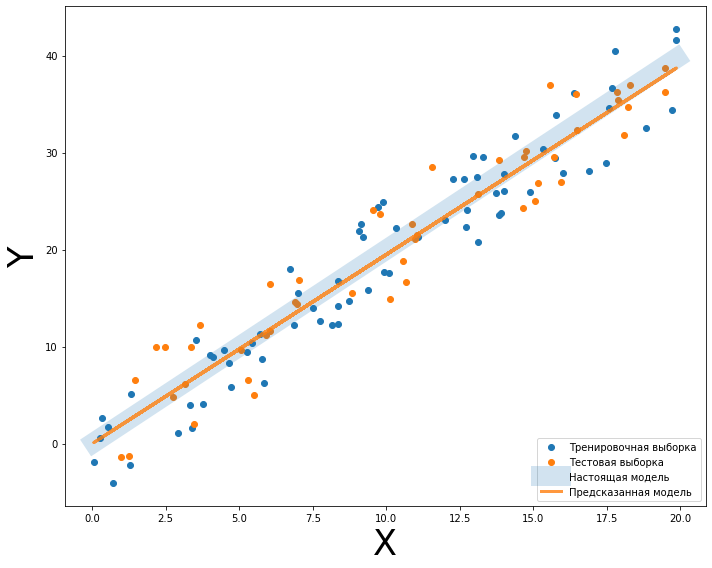

In [117]:
fig = plt.figure() # Инициализируем полотно
fig.set_size_inches(10, 8)  # Установка размеров графика

plt.scatter(X_train, y_train)  # Рассеянная диаграмма для тренировочной выборки
plt.scatter(X_test, y_test)  # Рассеянная диаграмма для тестовой выборки

plt.plot(X, [2*x for x in X], alpha=0.2, linewidth=20)  # График настоящей модели
plt.plot(X_train[index_argsort], model.predict(X_train[index_argsort]), alpha=0.8, linewidth=3)  # График предсказанной модели

plt.xlabel('X', fontsize=35)  # Название оси X
plt.ylabel('Y', fontsize=35)  # Название оси Y
plt.tight_layout()  # Автоматическое выравнивание
plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'Настоящая модель', 'Предсказанная модель'], loc='lower right')  # Легенда
plt.show()  # Показать график


In [118]:
model.coef_

array([[1.94918475]])

In [119]:
X_pol_train = X_train.copy()

for k in range(2,26):
    X_pol_train = np.append(X_pol_train, np.array([x**k for x in X_pol[:,0]]).reshape(72,-1), axis=1)
X_pol_train

array([[1.03441738e+01, 2.69735236e+02, 4.43002853e+03, ...,
        9.03198784e+27, 1.48337920e+29, 2.43624537e+30],
       [1.27076287e+01, 4.11474113e+01, 2.63945205e+02, ...,
        3.67230674e+18, 2.35564699e+19, 1.51105916e+20],
       [5.27819141e+00, 2.72021317e-01, 1.41874521e-01, ...,
        3.14726846e-07, 1.64147873e-07, 8.56124111e-08],
       ...,
       [6.98504387e-01, 2.40201277e+02, 3.72274224e+03, ...,
        2.38021440e+27, 3.68895819e+28, 5.71730536e+29],
       [5.84566253e+00, 3.22154528e+02, 5.78224326e+03, ...,
        6.96207586e+28, 1.24959958e+30, 2.24286426e+31],
       [1.37324729e+01, 3.03816343e+01, 1.67462164e+02, ...,
        1.12209085e+17, 6.18491288e+17, 3.40909538e+18]])

In [120]:
X_pol_test = X_test.copy()

for k in range(2,26):
    X_pol_test = np.append(X_pol_test, np.array([x**k for x in X_pol_test[:,0]]).reshape(48,-1), axis=1)
X_pol_test

array([[1.38378964e+01, 1.91487377e+02, 2.64978248e+03, ...,
        1.75635267e+26, 2.43042262e+27, 3.36319365e+28],
       [1.94821216e+01, 3.79553064e+02, 7.39449896e+03, ...,
        4.58810944e+29, 8.93861062e+30, 1.74143099e+32],
       [5.51010657e+00, 3.03612745e+01, 1.67293858e+02, ...,
        1.11347372e+17, 6.13535889e+17, 3.38064813e+18],
       ...,
       [9.68091205e-01, 9.37200581e-01, 9.07295639e-01, ...,
        4.74323140e-01, 4.59188060e-01, 4.44535923e-01],
       [1.01282555e+01, 1.02581560e+02, 1.03897225e+03, ...,
        1.34059297e+23, 1.35778681e+24, 1.37520118e+25],
       [1.05861926e+01, 1.12067475e+02, 1.18636788e+03, ...,
        3.70693728e+23, 3.92423522e+24, 4.15427100e+25]])

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
scaler = StandardScaler()
model = Ridge()

In [122]:
X_pol_test_scaled = scaler.fit_transform(X_pol_test)
X_pol_train_scaled = scaler.fit_transform(X_pol_train)

In [123]:
model.fit(X_pol_train_scaled, y_train)

Ridge()

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

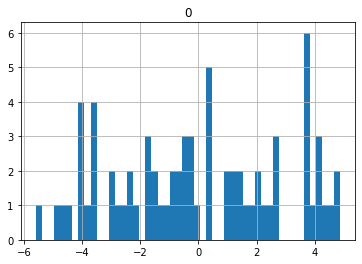

In [124]:
pd.DataFrame(y_train - model.predict(X_pol_train_scaled)).hist(bins=50)

In [125]:
X_pol_train_scaled

array([[ 0.0997249 ,  1.14278614,  1.09492151, ..., -0.18505022,
        -0.19188021, -0.19701089],
       [ 0.53224171, -0.78277254, -0.79427439, ..., -0.26647477,
        -0.2598395 , -0.25369005],
       [-0.82735968, -1.12709517, -0.91390142, ..., -0.26647477,
        -0.2598395 , -0.25369005],
       ...,
       [-1.66545127,  0.89400049,  0.77418804, ..., -0.24501683,
        -0.24293897, -0.24038876],
       [-0.72351137,  1.58435132,  1.708111  , ...,  0.36116542,
         0.31265002,  0.26811146],
       [ 0.71979019, -0.87346037, -0.8380266 , ..., -0.26647477,
        -0.2598395 , -0.25369005]])

In [126]:
train_errors = np.mean((y_train - model.predict(X_pol_train_scaled))**2)
test_errors = np.mean((y_test - model.predict(X_pol_test_scaled))**2)
print(f'Ошибка на трейне: {train_errors}. \nОшибка на тесте:  {test_errors}')

Ошибка на трейне: 8.115149963545056. 
Ошибка на тесте:  14.52670684006656


In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_pol)
model_pol = LinearRegression()
model_pol.fit(X_train_scaled, y_train)

LinearRegression()

In [128]:
X_test_scaled = scaler.fit_transform(X_pol_test)

In [129]:
model_pol.score(X_train_scaled, y_train)


0.3006366266878677

In [130]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)
predictions_model_ridge = model_ridge.predict(X_test_scaled)
error_train = np.mean((y_train - model_ridge.predict(X_train_scaled))**2)
error_test = np.mean((y_test - model_ridge.predict(X_test_scaled))**2)
print(f'Ошибка на трейне: {error_train}', f'Ошибка на тесте: {error_test}')

ValueError: X has 25 features, but Ridge is expecting 121 features as input.

In [ ]:
train_error = np.mean((model_pol.predict(X_train_scaled) - y_train)**2)
test_error = np.mean((model_pol.predict(X_test_scaled) - y_test)**2)
print(f'Ошибка на трейне: {train_error}', f'Ошибка на тесте: {test_error}')

Ошибка на трейне: 8.087740263990717 Ошибка на тесте: 23.598466805261996


In [ ]:
X_train[:,0].reshape(90,)

ValueError: cannot reshape array of size 72 into shape (90,)

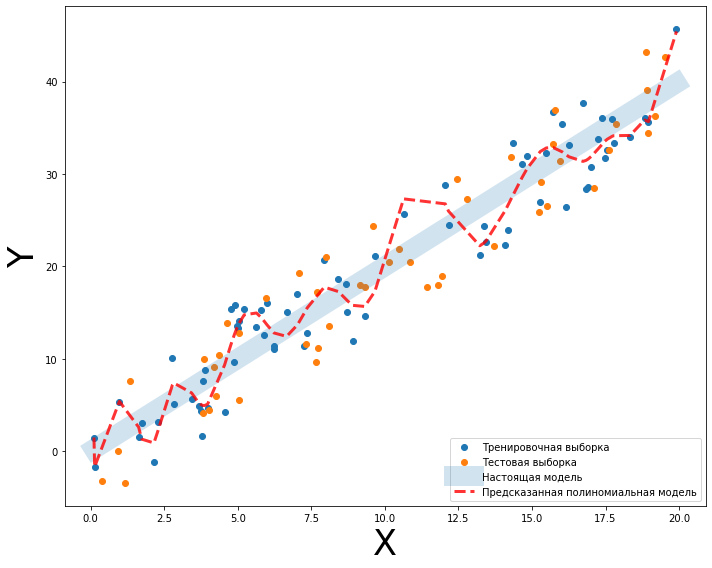

In [ ]:
fig = plt.figure() # Инициализируем полотно
fig.set_size_inches(10, 8)  # Установка размеров графика

plt.scatter(X_train, y_train)  # Рассеянная диаграмма для тренировочной выборки
plt.scatter(X_test, y_test)  # Рассеянная диаграмма для тестовой выборки

plt.plot(X, [2*x for x in X], alpha=0.2, linewidth=20)  # График настоящей модели
plt.plot(X_train[index_argsort], model_pol.predict(X_train_scaled[index_argsort]), '--r', alpha=0.8, linewidth=3)  # График предсказанной модели

plt.xlabel('X', fontsize=35)  # Название оси X
plt.ylabel('Y', fontsize=35)  # Название оси Y
plt.tight_layout()  # Автоматическое выравнивание
plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'Настоящая модель', 'Предсказанная полиномиальная модель'], loc='lower right')  # Легенда
plt.show()  # Показать график


In [ ]:
np.mean((model.predict(X_train) - y_train)**2)

11.954226436947744

In [ ]:
np.mean((model.predict(X_test) - y_test)**2)

13.585077553003769

In [ ]:
np.mean((model_pol.predict(X_train_scaled) - y_train)**2)

6.308865149958287

In [ ]:
#from sklearn.preprocessing import StandardScaler
X_pol_test = X_test.copy()

for k in range(2,26):
    X_pol_test = np.append(X_pol_test, np.array([x**k for x in X_pol_test[:,0]]).reshape(48,-1), axis=1)
    
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_pol_test)
#model_pol = LinearRegression()
#model_pol.predict(X_test_scaled)
np.mean((model_pol.predict(X_test_scaled) - y_test)**2)

88.11050432231042

СЛЕДУЮЩЕЕ ЗАДАНИЕ

In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
y = pd.read_csv(r"C:\Users\User\Downloads\247324\5 y.csv")
y

,таргет2
0,625.00
1,22.00
2,35.00
3,145.00
4,387.00
...,...
331670,269.84
331671,544.77
331672,202.00
331673,265.00


In [ ]:
data = pd.read_csv(r"C:\Users\User\Downloads\247324\5 x.csv")
data

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035.989239,1000.00,39,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3591.033473,80000.00,87,2009,34.41,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3661.424550,20.00,8,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4321.245721,99.00,79,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6035.989239,1900.00,28,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,7635.064778,35.98,2,2017,34.41,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
331671,38415.722876,271.03,4,2017,34.41,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
331672,6098.303122,200.00,3,2017,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
331673,38415.722876,250.00,1,2017,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
x = pd.read_csv(r"C:\Users\User\Downloads\247324\5 x.csv")
y = pd.read_csv(r"C:\Users\User\Downloads\247324\5 y.csv")

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=33)
kf.split(x)

<generator object _BaseKFold.split at 0x000001AC88CBC510>

In [134]:
train_index_temp = []
test_index_temp = []
i = 0
for train_index, test_index in kf.split(x):
    #train_index_temp.append(train_index)
    #test_index_temp.append(test_index)
    print(f'{i}-строка train_index : {train_index}, test_index : {test_index}')
    i += 1

#print(f'train_index_temp :{pd.DataFrame(train_index_temp).shape}, test_index_temp : {pd.DataFrame(test_index_temp).shape}')

0-строка train_index : [     1      2      3 ... 331672 331673 331674], test_index : [     0      4      5 ... 331654 331661 331664]
1-строка train_index : [     0      1      2 ... 331671 331672 331674], test_index : [    65     70     90 ... 331653 331659 331673]
2-строка train_index : [     0      1      2 ... 331672 331673 331674], test_index : [     6      9     11 ... 331641 331665 331667]
3-строка train_index : [     0      1      2 ... 331671 331672 331673], test_index : [     8     18     30 ... 331663 331670 331674]
4-строка train_index : [     0      1      2 ... 331672 331673 331674], test_index : [     3     13     15 ... 331651 331668 331671]
5-строка train_index : [     0      1      2 ... 331672 331673 331674], test_index : [    14     16     20 ... 331623 331630 331652]
6-строка train_index : [     0      1      2 ... 331672 331673 331674], test_index : [    36     39     44 ... 331650 331662 331666]
7-строка train_index : [     0      2      3 ... 331671 331673 331674

In [159]:
for i in x.columns:
    x[i] = x[i].apply(int)

In [160]:
x

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035,1000,39,2009,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3591,80000,87,2009,34,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3661,20,8,2009,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4321,99,79,2009,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6035,1900,28,2009,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,7635,35,2,2017,34,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
331671,38415,271,4,2017,34,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
331672,6098,200,3,2017,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
331673,38415,250,1,2017,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
losses_train = []
losses_test = []
for train_index, test_index in kf.split(x):
    X_train, X_test = x.values[train_index], x.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    scaller = StandardScaler()
    scaller_y = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    #y_train_scaled = scaller_y.fit_transform(y_train)
    model = Lasso()
    model.fit(X_train_scaled, y_train)
    
    losses_test.append(np.mean((model.predict(X_test_scaled)- y_test)**2)**(1/2))
    losses_train.append(np.mean(np.abs(pd.DataFrame(model.predict(X_train_scaled)) - pd.DataFrame(y_train))))
print(f'losses_train : {losses_train}, losses_test : {losses_test}')

    

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3502: 

losses_train : [0    14386.055049
dtype: float64, 0    14373.592981
dtype: float64, 0    14349.496245
dtype: float64, 0    14542.274016
dtype: float64, 0    14368.978909
dtype: float64, 0    14191.484058
dtype: float64, 0    14441.422859
dtype: float64, 0    14072.842433
dtype: float64, 0    14422.048856
dtype: float64, 0    14114.390363
dtype: float64], losses_test : [62192.96520410938, 81580.23146239306, 77803.33368690417, 56873.22304135609, 75771.45867940944, 122496.94760002472, 72788.46640632601, 135838.5232397492, 70422.9029352002, 156137.28488839095]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
initial_data = pd.read_csv(r"C:\Users\User\Downloads\247324\5 initial_data.csv", index_col='id')

#initial_cols = ['vendor_id', 'passenger_count', 'pickup_longitude',
#                'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
#                'trip_duration']

#initial_data = initial_data[initial_cols]
initial_data

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0
...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778.0
id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655.0
id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764.0


In [ ]:
import datetime as dt
initial_data.pickup_datetime = initial_data.pickup_datetime.astype('datetime64[s]').dt.date
initial_data

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,
id2875421,2,2016-03-14,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
id2377394,1,2016-06-12,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
id3858529,2,2016-01-19,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
id3504673,2,2016-04-06,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
id2181028,2,2016-03-26,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0
...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08,4,-73.982201,40.745522,-73.994911,40.740170,N,778.0
id1049543,1,2016-01-10,1,-74.000946,40.747379,-73.970184,40.796547,N,655.0
id2304944,2,2016-04-22,1,-73.959129,40.768799,-74.004433,40.707371,N,764.0


array([[<AxesSubplot: title={'center': 'passenger_count'}>]], dtype=object)

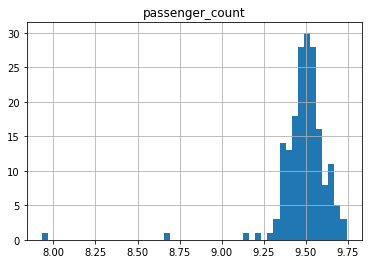

In [ ]:
np.log1p(initial_data.groupby('pickup_datetime').agg({'passenger_count':'sum'})).hist(bins=50)

In [ ]:
initial_data = initial_data.assign(log_trip_duration = np.log1p(initial_data.trip_duration))
initial_data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration
id,,,,,,,,
id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,455.0,6.122493
id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,663.0,6.498282
id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,2124.0,7.661527
id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,429.0,6.063785
id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,435.0,6.077642
...,...,...,...,...,...,...,...,...
id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,778.0,6.658011
id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,655.0,6.486161
id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,764.0,6.639876


In [ ]:
initial_data.drop('trip_duration',axis=1, inplace=True)
initial_data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration
id,,,,,,,
id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,6.122493
id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,6.498282
id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,7.661527
id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,6.063785
id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,6.077642
...,...,...,...,...,...,...,...
id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,6.658011
id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,6.486161
id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,6.639876


In [ ]:
processed_data = pd.read_csv(r"C:\Users\User\Downloads\247324\5 processed_data.csv")
processed_data

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km
0,id2875421,1,930.399753,0,455.0,1.500479
1,id2377394,0,930.399753,0,663.0,1.807119
2,id3858529,1,930.399753,0,2124.0,6.392080
3,id3504673,1,930.399753,0,429.0,1.487155
4,id2181028,1,930.399753,0,435.0,1.189925
...,...,...,...,...,...,...
1458639,id2376096,1,1053.529749,0,778.0,1.226296
1458640,id1049543,0,930.399753,0,655.0,6.056935
1458641,id2304944,1,930.399753,0,764.0,7.832952
1458642,id2714485,0,930.399753,0,373.0,1.093786


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
X = initial_data.drop('log_trip_duration', axis=1)
y = initial_data.log_trip_duration
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
cv = KFold(n_splits=10, shuffle=True, random_state=33)
cv_result = cross_validate(model, X=X_train, y=y_train, cv=cv, 
                           n_jobs=-1, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)




In [ ]:
np.mean(-cv_result['test_score'])

0.6249353544661127

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
np.mean((y_test - model.predict(X_test))**2)

0.6159333177575478

In [ ]:
X = data.drop('trip_duration', axis=1)
y = data['trip_duration']

In [ ]:

X.pickup_datetime = X.pickup_datetime.astype('datetime64[s]').dt.month


In [ ]:
X = X.drop('id', axis=1)
X

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,2,3,1,-73.982155,40.767937,-73.964630,40.765602,N
1,1,6,1,-73.980415,40.738564,-73.999481,40.731152,N
2,2,1,1,-73.979027,40.763939,-74.005333,40.710087,N
3,2,4,1,-74.010040,40.719971,-74.012268,40.706718,N
4,2,3,1,-73.973053,40.793209,-73.972923,40.782520,N
...,...,...,...,...,...,...,...,...
1458639,2,4,4,-73.982201,40.745522,-73.994911,40.740170,N
1458640,1,1,1,-74.000946,40.747379,-73.970184,40.796547,N
1458641,2,4,1,-73.959129,40.768799,-74.004433,40.707371,N
1458642,1,1,1,-73.982079,40.749062,-73.974632,40.757107,N


In [ ]:
X = pd.concat([X, pd.get_dummies(X.store_and_fwd_flag,prefix='store_and_fwd_flag')], axis=1).drop(['store_and_fwd_flag', 'store_and_fwd_flag_Y'], axis=1)
X

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag_N
0,2,3,1,-73.982155,40.767937,-73.964630,40.765602,1
1,1,6,1,-73.980415,40.738564,-73.999481,40.731152,1
2,2,1,1,-73.979027,40.763939,-74.005333,40.710087,1
3,2,4,1,-74.010040,40.719971,-74.012268,40.706718,1
4,2,3,1,-73.973053,40.793209,-73.972923,40.782520,1
...,...,...,...,...,...,...,...,...
1458639,2,4,4,-73.982201,40.745522,-73.994911,40.740170,1
1458640,1,1,1,-74.000946,40.747379,-73.970184,40.796547,1
1458641,2,4,1,-73.959129,40.768799,-74.004433,40.707371,1
1458642,1,1,1,-73.982079,40.749062,-73.974632,40.757107,1


In [ ]:
kf = KFold(n_splits=20, shuffle=True, random_state=33)
kf

KFold(n_splits=20, random_state=33, shuffle=True)

In [ ]:
kf.split(X)

<generator object _BaseKFold.split at 0x0000015780322120>

In [ ]:
losses_test = list()
losses_train = list()
for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    losses_test.append(np.mean(((y_test - model.predict(X_test))**2)**(1/2)))
    losses_train.append(np.mean(((y_train - model.predict(X_train))**2)**(1/2)))

In [ ]:
np.mean(losses_test)

607.8918437020676

In [ ]:
np.mean(losses_train)

607.8156994417199

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression



In [ ]:
processed_data = pd.read_csv(r"C:\Users\User\Downloads\247324\5 processed_data.csv")
processed_data

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km
0,id2875421,1,930.399753,0,455.0,1.500479
1,id2377394,0,930.399753,0,663.0,1.807119
2,id3858529,1,930.399753,0,2124.0,6.392080
3,id3504673,1,930.399753,0,429.0,1.487155
4,id2181028,1,930.399753,0,435.0,1.189925
...,...,...,...,...,...,...
1458639,id2376096,1,1053.529749,0,778.0,1.226296
1458640,id1049543,0,930.399753,0,655.0,6.056935
1458641,id2304944,1,930.399753,0,764.0,7.832952
1458642,id2714485,0,930.399753,0,373.0,1.093786


In [ ]:
#processed_data['trip_duration_logged'] = np.log1p(processed_data.trip_duration)
X = processed_data.drop(['trip_duration'], axis=1)
X.set_index('id', inplace=True)
y = processed_data.trip_duration
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
kf = KFold(n_splits=20, shuffle=True, random_state=33)
cv_result = cross_validate(model, X_train, y_train, cv=kf, n_jobs=-1, scoring=, return_train_score=True)
cv_result

{'fit_time': array([0.27096796, 0.24300075, 0.25900102, 0.2409873 , 0.2470336 ,
        0.25000024, 0.24899983, 0.26500535, 0.24699855, 0.24496603,
        0.23800111, 0.24700165, 0.24400544, 0.2710309 , 0.26399398,
        0.25899649, 0.23896432, 0.24796629, 0.24099779, 0.20400143]),
 'score_time': array([0.00402927, 0.00401831, 0.00297832, 0.00299573, 0.00396991,
        0.00400114, 0.00300026, 0.00298977, 0.00399971, 0.00300097,
        0.00399947, 0.00503159, 0.00396395, 0.00300217, 0.0040319 ,
        0.00197196, 0.00299907, 0.00399804, 0.00396919, 0.00296926]),
 'test_score': array([-0.39005766, -0.40181029, -0.50793847, -0.39525545, -0.60988242,
        -0.40796676, -0.44755127, -0.40896493, -0.39873004, -0.39454998,
        -0.3980174 , -0.40465475, -0.39423988, -0.40679294, -0.44356295,
        -0.70191599, -0.41825838, -0.38913766, -0.40273221, -0.39059465]),
 'train_score': array([-0.43491669, -0.43429813, -0.42875973, -0.43464435, -0.42372444,
        -0.43396235, -0.431876

In [ ]:
cv_result['train_score'].mean()

-0.4325812679415022

In [ ]:
kf = KFold(n_splits=20, shuffle=True, random_state=33)
cv_result = cross_validate(model, X_train, y_train, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error', return_train_score=True)
cv_result['train_score'].mean()


-20963440.970229525

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


СЛЕДУЮЩЕЕ ЗАДАНИЕ. КОЛЛИНЕАРНОСТЬ ПРИЗНАКОВ. РЕГУЛИЗАЦИЯ

In [1]:
#Загружаем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [2]:
processed_data = pd.read_csv(r"C:\Users\User\Downloads\247324\5 processed_data.csv").set_index('id')
#new_data = pd.read_csv(r)

In [15]:
np.linalg.matrix_rank(processed_data.values)

5

In [4]:
X = processed_data.drop(columns='distance_km')
y = processed_data.distance_km

In [37]:
model = Ridge(alpha=10)
kf = KFold(n_splits=10, shuffle=True, random_state=33)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
cv_result = cross_validate(model, X=X_train, scoring='neg_mean_squared_log_error', y=y_train, cv=kf, return_train_score=True)
#error_test = model.predict(X_test) - y_test
cv_result


{'fit_time': array([0.22430491, 0.23045421, 0.23508239, 0.23272753, 0.25233459,
        0.22480178, 0.23323035, 0.21692157, 0.21814919, 0.23469448]),
 'score_time': array([0.03113866, 0.03013301, 0.03036022, 0.0299623 , 0.03563476,
        0.03047323, 0.03077364, 0.02900982, 0.02900386, 0.02964258]),
 'test_score': array([-0.43522993, -0.44149241, -0.43649342, -0.4405122 , -0.43979934,
        -0.44125624, -0.44058906, -0.43885717, -0.43973378, -0.43895395]),
 'train_score': array([-0.43598623, -0.43882818, -0.43930848, -0.4400499 , -0.43856278,
        -0.43971099, -0.44005785, -0.44018458, -0.44018292, -0.44006631])}

In [43]:
for i in range(1,200, 50):
    model = Ridge(alpha=i)
    kf = KFold(n_splits=10, shuffle=True, random_state=33)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    cv_result = cross_validate(model, X=X_train_scaled, scoring='neg_mean_squared_log_error', y=y_train, cv=kf, return_train_score=True, n_jobs=-1)
    #error_test = model.predict(X_test) - y_test
    

{'fit_time': array([0.16221905, 0.15677524, 0.16434526, 0.16176391, 0.1617136 ,
       0.15776491, 0.17718315, 0.16191959, 0.14349079, 0.14714527]), 'score_time': array([0.02717543, 0.0280745 , 0.02959371, 0.02832508, 0.02709007,
       0.02926254, 0.02796555, 0.02883697, 0.02565885, 0.02526355]), 'test_score': array([-0.43523021, -0.44149248, -0.43649385, -0.44051222, -0.43979947,
       -0.44125621, -0.44058902, -0.43885745, -0.43973359, -0.43895415]), 'train_score': array([-0.43598636, -0.43882829, -0.43930859, -0.44005001, -0.43856288,
       -0.4397111 , -0.44005796, -0.4401847 , -0.44018302, -0.44006642])}
{'fit_time': array([0.16682673, 0.17271948, 0.17908359, 0.17015266, 0.16792345,
       0.17200947, 0.15717173, 0.16808248, 0.16841936, 0.1441462 ]), 'score_time': array([0.03025293, 0.03400207, 0.03495049, 0.02911472, 0.03209662,
       0.02799821, 0.02814865, 0.02896571, 0.02808189, 0.02403927]), 'test_score': array([-0.43523102, -0.44149293, -0.43649427, -0.44051257, -0.43979

In [5]:
new_df = pd.read_csv(r"C:\Users\User\Downloads\new_data.csv")

In [12]:
np.logspace(-6, 6, 13)

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = new_df.set_index('id').drop('log_trip_duration', axis=1)
y = new_df.log_trip_duration
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=33)

params = {'alpha': np.logspace(0,10,10)}
model = Ridge()
grid = GridSearchCV(model, cv=5, param_grid=params,  
                    greater_is_better=False, 
                    scoring='neg_mean_squared_log_error', 
                    return_train_score=True, 
                    n_jobs=-1)
grid.fit(X_train, y_train)



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
 -0.00807819         nan         nan         nan]
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the train scores are non-finite: [        nan         nan         nan         nan         nan         nan
 -0.00807524         nan         nan         nan]
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.4701e-29): result may not be

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10])},
             return_train_score=True, scoring='neg_mean_squared_log_error')

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = new_df.set_index('id').drop('log_trip_duration', axis=1)
y = new_df.log_trip_duration
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=33)

params = {'alpha': np.logspace(0,10,10)}
model = Ridge()
grid = GridSearchCV(model, cv=5, param_grid=params,  
                    scoring='neg_mean_squared_log_error', 
                    return_train_score=True, 
                    n_jobs=-1)
grid.fit(X_train, y_train)
print(f'best_score_ : {grid.best_score_}, grid.best_params_ : {grid.best_params_}')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan -0.00865296
 -0.01098069 -0.0126156  -0.01281934 -0.01283588]
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the train scores are non-finite: [        nan         nan         nan         nan         nan -0.00864941
 -0.01098014 -0.01261557 -0.01281933 -0.01283587]
  warnings.warn(


best_score_ : -0.00865295570605269, grid.best_params_ : {'alpha': 359381.36638046254}


In [14]:
print(f'best_score_ : {grid.best_score_}, grid.best_params_ : {grid.best_params_}')

best_score_ : -0.008078191377337682, grid.best_params_ : {'alpha': 4641588.833612782}


РАБОТА С ВЫБРОСАМИ ЧЕРЕЗ BOXPLOT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

temp_df = pd.read_csv(r"C:\Users\User\Downloads\247324\1\ks.csv")
temp_df

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.00
1,Arcade County (Canceled),Games,Games,USD,2012-04-29,2012-03-30 23:40:45,canceled,5,US,71.00,9000.00
2,Hayashi Skate Co. Solar Skateboard backpack,Accessories,Fashion,CAD,2017-07-22,2017-05-23 23:00:13,canceled,8,CA,360.36,2391.77
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.00
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.00
...,...,...,...,...,...,...,...,...,...,...,...
378656,Kitten Mittens - is your cat making too much N...,Knitting,Crafts,NZD,2016-11-23,2016-10-24 21:08:37,suspended,0,NZ,0.00,48.59
378657,TurnAround//The End Needs A Beginning Album Re...,Rock,Music,GBP,2013-05-15,2013-04-15 19:09:37,failed,0,GB,0.00,2501.45
378658,Celtic inspired band looking to move forward w...,Rock,Music,USD,2011-04-29,2011-03-29 03:11:40,failed,0,US,0.00,1500.00
378659,Listening & Speaking in Virtual Reality: 5 Int...,Software,Technology,USD,2014-05-09,2014-04-30 02:45:45,failed,1,US,200.00,67000.00


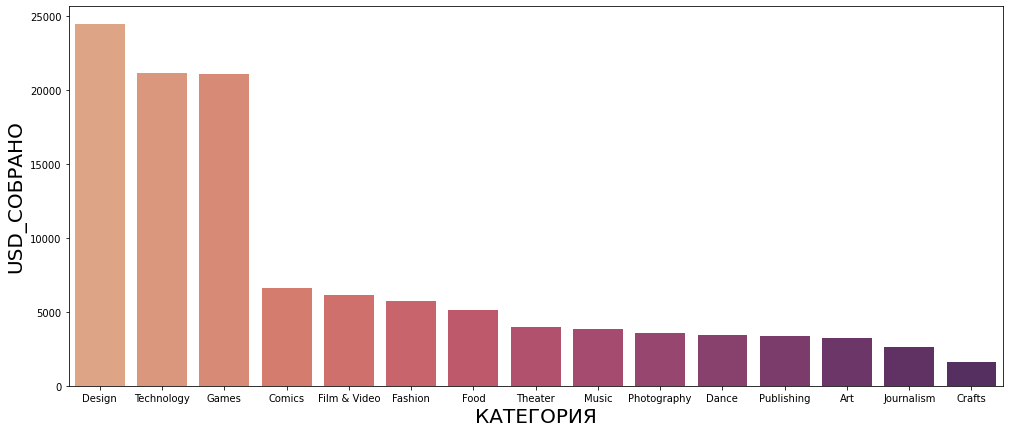

In [29]:
data=temp_df.groupby('Главная категория', as_index=False)['Собрано в долларах'].mean()
fig = plt.figure()
fig.set_size_inches(18,6)
sns.barplot(data.sort_values('Собрано в долларах', ascending=False), x='Главная категория', y='Собрано в долларах',palette='flare' )
#sns.color_palette("flare")
plt.tight_layout()
plt.xlabel('КАТЕГОРИЯ', size=20)  # Specify the label size
plt.ylabel('USD_СОБРАНО', size=20)
plt.show()

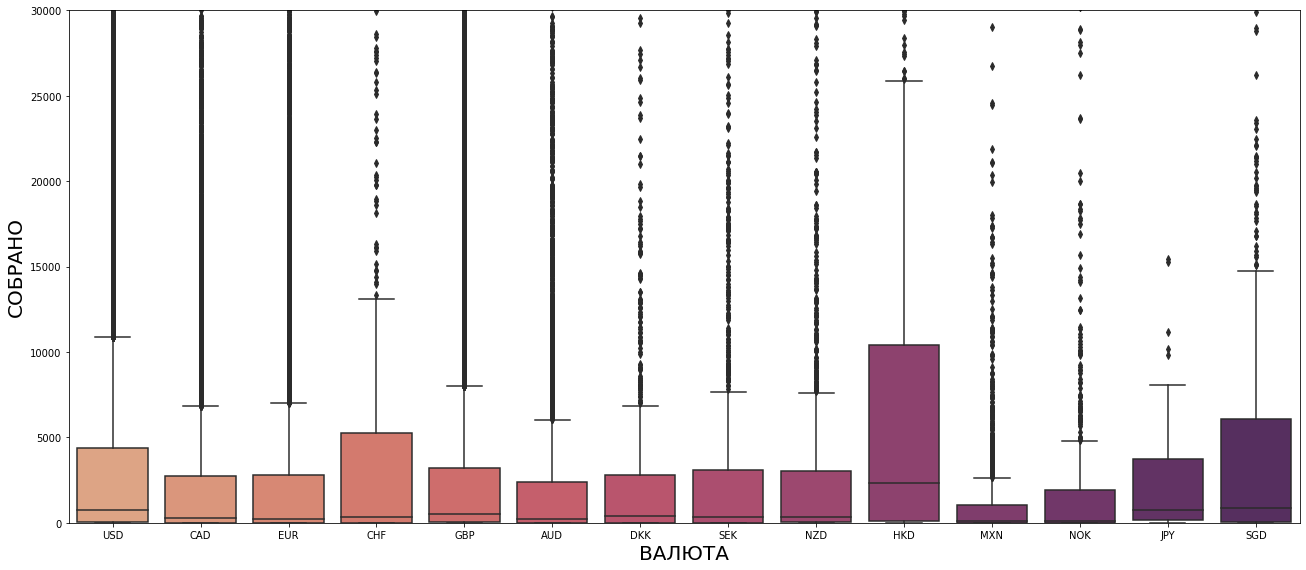

In [44]:
fig = plt.figure()
fig.set_size_inches(18,8)
sns.boxplot(temp_df, x="Валюта", y='Собрано в долларах', palette='flare' )
plt.tight_layout()
plt.xlabel('ВАЛЮТА', size=20)  # Specify the label size
plt.ylabel('СОБРАНО', size=20)
plt.ylim((0,30000))
plt.show()

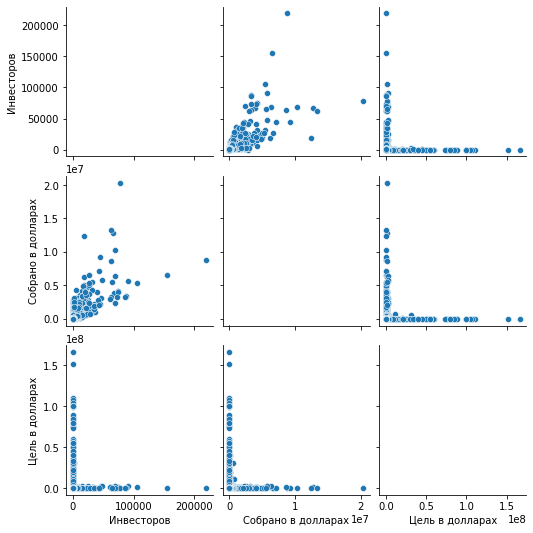

In [46]:
sns.pairplot(temp_df)

In [61]:
from sklearn.linear_model import LassoCV
X = pd.read_csv(r"C:\Users\User\Downloads\247324\5 x.csv")
y = pd.read_csv(r"C:\Users\User\Downloads\247324\5 y.csv")
model = Lasso(alpha=10)
model.fit(X, y)
model.coef_

array([ 5.99392746e-02, -1.00476218e-04, -2.43510559e+01,  1.21383042e+03,
       -0.00000000e+00,  1.73511879e+03, -0.00000000e+00, -0.00000000e+00,
        2.97727341e+01,  1.20034676e+03, -0.00000000e+00,  0.00000000e+00,
        1.01197793e+03, -0.00000000e+00, -0.00000000e+00,  7.21648168e+02,
       -0.00000000e+00,  8.66048441e+02, -2.96791863e+02,  1.76331663e+03,
       -0.00000000e+00, -5.98288472e+02,  0.00000000e+00, -8.87009396e+01,
       -0.00000000e+00,  3.05505009e+02, -0.00000000e+00,  8.97101338e+02,
        0.00000000e+00,  2.24708205e+02, -1.36895453e+00,  1.10300826e+03])

In [77]:
scores = []
for i in range(1, 100, 10):
    model = Lasso(alpha=i)
    model.fit(X, y)
    scores.append(model.score(X,y))

scores


[0.0007645200153436615,
 0.0007388832477730478,
 0.0007241463160932993,
 0.0007105495110564242,
 0.0007003759549031319,
 0.0006948589499337077,
 0.0006906118950121831,
 0.0006892754184613104,
 0.0006877364454759283,
 0.0006859949760562589]

In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(model, n_features_to_select=25, direction='backward')
sfs.fit(X,y)
sfs.get_feature_names_out()

array(['Цель в долларах', 'Срок', 'Год публикации', 'Close_brent', 'CAD',
       'CHF', 'DKK', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK',
       'SGD', 'USD', 'Art', 'Comics', 'Crafts', 'Dance', 'Design',
       'Fashion', 'Film & Video', 'Journalism', 'Theater'], dtype=object)

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(model, n_features_to_select=10)
sfs.fit(X,y)
sfs.get_feature_names_out()

array(['Срок', 'Год публикации', 'CHF', 'DKK', 'NOK', 'Art', 'Dance',
       'Fashion', 'Film & Video', 'Journalism'], dtype=object)

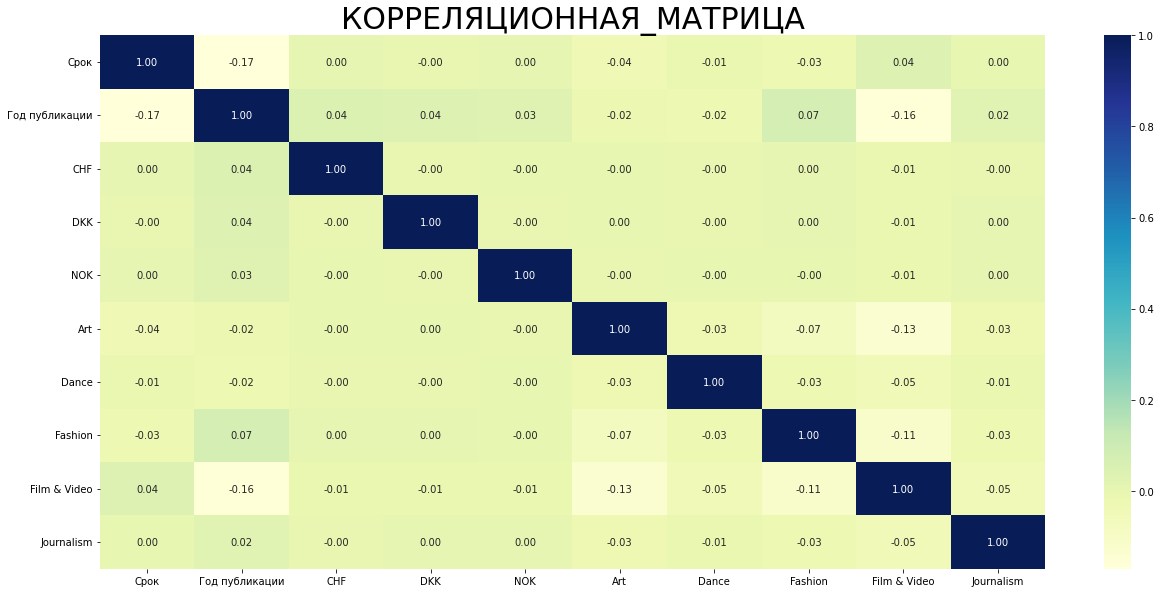

In [105]:
fig = plt.figure()
fig.set_size_inches(18,8)
data = X[['Срок', 'Год публикации', 'CHF', 'DKK', 'NOK', 'Art', 'Dance','Fashion', 'Film & Video', 'Journalism']]
sns.heatmap(data.corr(), xticklabels=data.columns, yticklabels=data.columns, annot=True, fmt='.2f', cmap='YlGnBu')
plt.tight_layout()
plt.title('КОРРЕЛЯЦИОННАЯ_МАТРИЦА', fontsize=30)
plt.show()


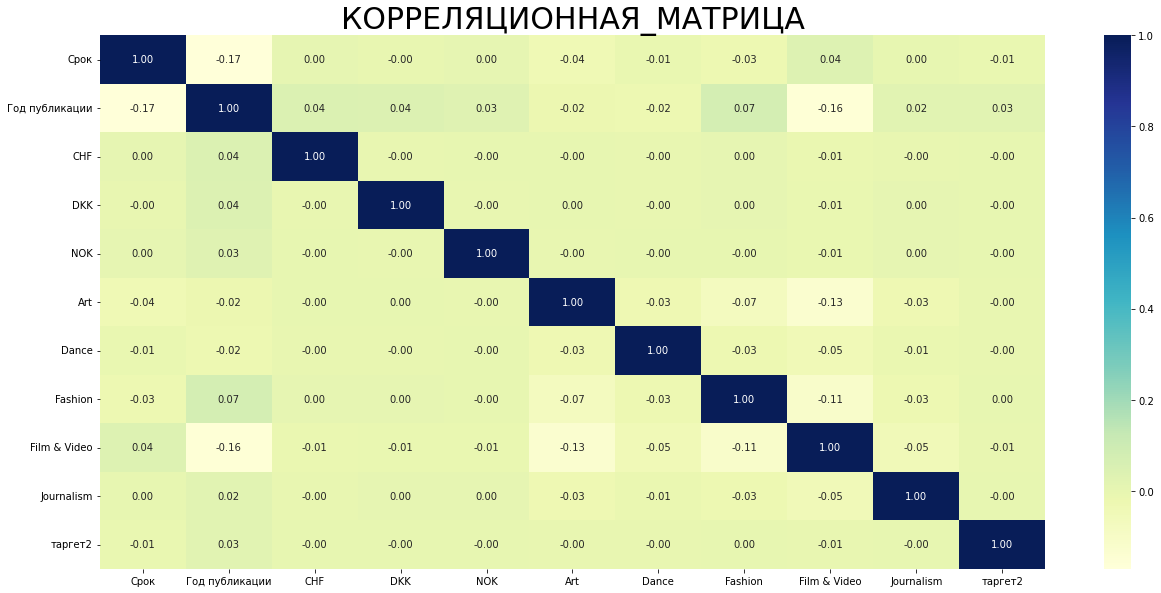

In [110]:
fig = plt.figure()
fig.set_size_inches(18,8)
data = X[['Срок', 'Год публикации', 'CHF', 'DKK', 'NOK', 'Art', 'Dance','Fashion', 'Film & Video', 'Journalism']]
sns.heatmap(pd.concat((data, y), axis=1).corr(), annot=True, fmt='.2f', cmap='YlGnBu')

plt.tight_layout()
plt.title('КОРРЕЛЯЦИОННАЯ_МАТРИЦА', fontsize=30)
plt.show()

ДОМАШНЕЕ ЗАДАНИЕ

In [732]:
#Вызов библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [733]:
#Объявим датасеты и выведем редактируемый
processed_data = pd.read_csv(r"C:\Users\User\Downloads\processed_data.csv")
taxi_dataset = pd.read_csv(r"C:\Users\User\Downloads\taxi_dataset.csv")

id                  0          id2875421
                    1          id2377394
                    2          id3858529
                    3          id3504673
                    4          id2181028
                                 ...    
store_and_fwd_flag  1458639            N
                    1458640            N
                    1458641            N
                    1458642            N
                    1458643            N
Length: 14586440, dtype: object

In [747]:
pd.DataFrame(taxi_dataset.corr() \
                        .abs() \
                        .unstack() \
                        .sort_values(ascending=False)) \
                        .reset_index() \
                        .query('(level_0 != level_1)')

C:\Users\User\AppData\Local\Temp\ipykernel_16544\3182490227.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(taxi_dataset.corr().abs().unstack().sort_values(ascending=False)).reset_index().query('(level_0 != level_1)')


,level_0,level_1,0
6,dropoff_longitude,pickup_longitude,0.783582
7,pickup_longitude,dropoff_longitude,0.783582
8,dropoff_latitude,pickup_latitude,0.494038
9,pickup_latitude,dropoff_latitude,0.494038
10,passenger_count,vendor_id,0.287415
11,vendor_id,passenger_count,0.287415
12,dropoff_longitude,dropoff_latitude,0.124873
13,dropoff_latitude,dropoff_longitude,0.124873
14,pickup_latitude,dropoff_longitude,0.114884
15,dropoff_longitude,pickup_latitude,0.114884


In [734]:
taxi_dataset

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N


ВИУЗАЛИЗИРУЕМ ДАННЫЕ, ДЛЯ ПОНИМАНИЯ КАКОЙ ПОРЯДОК ЧИСЕЛ У ТАРГЕТА

C:\Users\User\AppData\Local\Temp\ipykernel_16544\1235259565.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(taxi_dataset.pickup_datetime, bins=taxi_dataset.pickup_datetime.nunique(), palette='whitegrid')


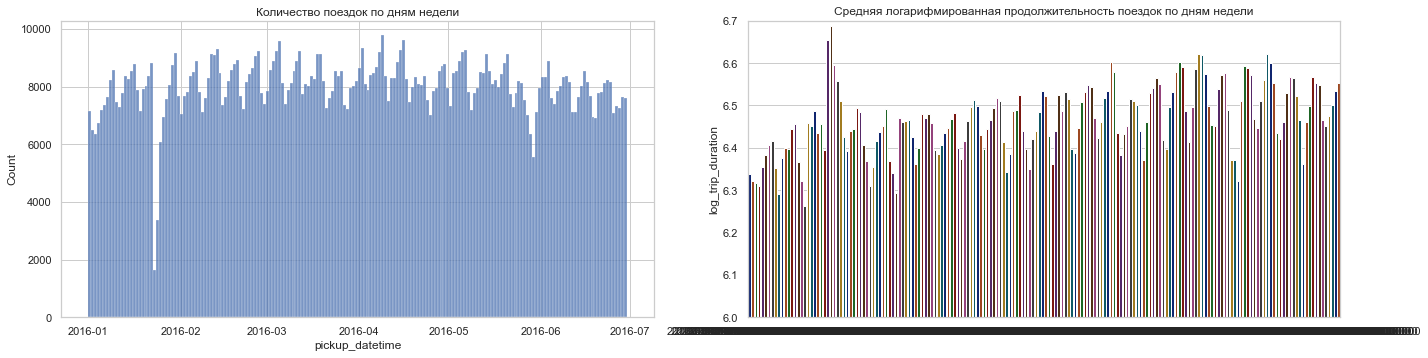

In [496]:
#Проанализируем распределение заказов по дням для понимания общего порядка чисел
fig = plt.figure()
fig.set_size_inches(20,5)
taxi_dataset[['pickup_datetime','dropoff_datetime']] = taxi_dataset[['pickup_datetime','dropoff_datetime']].astype('datetime64[D]')
ax_1 = fig.add_subplot(1,2,1)
sns.histplot(taxi_dataset.pickup_datetime, bins=taxi_dataset.pickup_datetime.nunique(), palette='whitegrid')
ax_2 = fig.add_subplot(1,2,2)
temp = data_to_plot.sort_values('pickup_datetime').groupby('pickup_datetime', as_index=False)['log_trip_duration'].mean()
sns.barplot(x=sorted(list(temp.pickup_datetime.unique())), 
        y=temp.log_trip_duration, palette='dark')

plt.ylim((6, 6.7))
fig.tight_layout()
ax_1.set(title = 'Количество поездок по дням недели')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по дням недели')

plt.show()

ВЫПОЛНИМ ПРЕОБРАЗОВАНИЕ ДАННЫХ

In [524]:
#Выделим значения часа, дня недели и номер месяца в отдельное значение и добавим к основному датасету
taxi_dataset['hour'] = taxi_dataset['pickup_datetime'].astype('datetime64[h]').dt.hour
taxi_dataset['day_of_week'] = taxi_dataset['pickup_datetime'].astype('datetime64[h]').dt.weekday
taxi_dataset['month'] = taxi_dataset['pickup_datetime'].astype('datetime64[h]').dt.month

#Приведем к бинарному виду категориальные колоноки
taxi_dataset['vendor_id'] = np.where(taxi_dataset.vendor_id == 1,0,1)
taxi_dataset['store_and_fwd_flag'] = np.where(taxi_dataset.store_and_fwd_flag == 'Y',1,0)

#Создадим параметр аномалии для 2016-01-23, см. граик выше
taxi_dataset['pickup_datetime'] = taxi_dataset['pickup_datetime'].astype('datetime64[D]')
taxi_dataset['anomaly'] = 0
taxi_dataset.loc[taxi_dataset['pickup_datetime'].astype('datetime64[D]').astype(str) == '2016-01-23', 'anomaly'] = 1

#Удалим остаточные данные после преобразования
taxi_dataset.drop(['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',	'store_and_fwd_flag'], axis=1, inplace=True)

#Добавим колонки из обработанного датасета
taxi_dataset = taxi_dataset.merge(processed_data[['id', 'passenger_count', 'distance_km', 'log_trip_duration']], on='id', how='left')
taxi_dataset

,id,vendor_id,hour,day_of_week,month,anomaly,passenger_count,distance_km,log_trip_duration
0,id2875421,1,17,0,3,0,930.399753,1.500479,6.122493
1,id2377394,0,0,6,6,0,930.399753,1.807119,6.498282
2,id3858529,1,11,1,1,0,930.399753,6.392080,7.661527
3,id3504673,1,19,2,4,0,930.399753,1.487155,6.063785
4,id2181028,1,13,5,3,0,930.399753,1.189925,6.077642
...,...,...,...,...,...,...,...,...,...
1458639,id2376096,1,13,4,4,0,1053.529749,1.226296,6.658011
1458640,id1049543,0,7,6,1,0,930.399753,6.056935,6.486161
1458641,id2304944,1,6,4,4,0,930.399753,7.832952,6.639876
1458642,id2714485,0,15,1,1,0,930.399753,1.093786,5.924256


Text(0.5, 0, 'Час выполнения заказа')

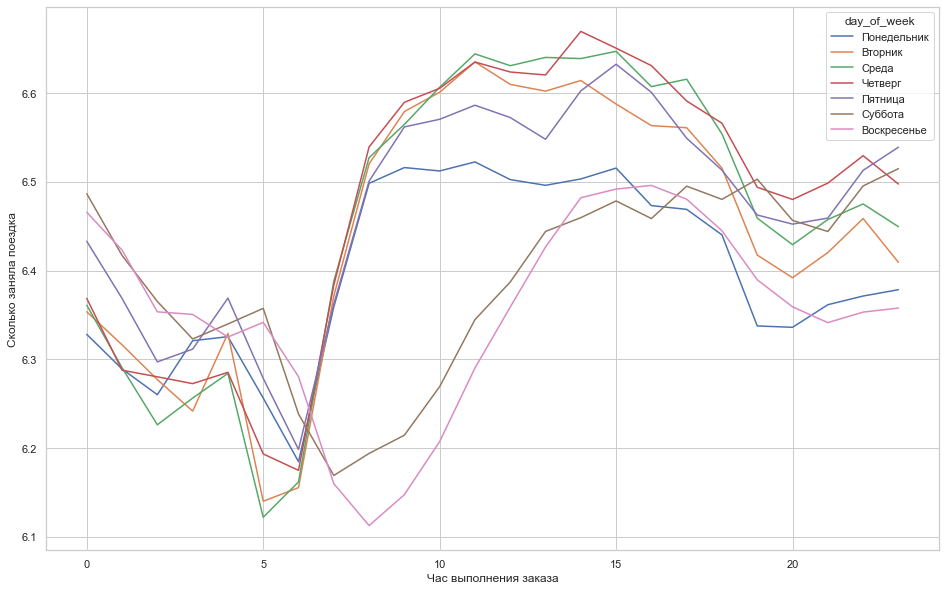

In [492]:
#Проанализируем загруженность в течении дня в сравнении по дням недели
frame = taxi_dataset.groupby(['hour','day_of_week'], as_index=False)['log_trip_duration'].mean()
frame = frame.pivot_table(columns='day_of_week', 
                        index='hour', 
                        values='log_trip_duration') \
                        .rename(columns={0 :'Понедельник', 1:'Вторник', 2:'Среда', 3:'Четверг', 4:'Пятница', 5:'Суббота', 6:'Воскресенье'})
frame.plot(figsize=(16, 10))

plt.ylabel('Сколько заняла поездка')
plt.xlabel('Час выполнения заказа')



In [488]:
#Проанализируем загруженность в течении дня в сравнении по дням недели
frame.style.background_gradient(cmap='RdPu')

day_of_week,Понедельник,Вторник,Среда,Четверг,Пятница,Суббота,Воскресенье
hour,,,,,,,
0,6.328173,6.353598,6.361024,6.368642,6.433067,6.486600,6.465794
1,6.289221,6.316450,6.290582,6.287852,6.368686,6.417126,6.423073
2,6.260257,6.277271,6.226347,6.280400,6.297224,6.365256,6.353585
3,6.321038,6.241751,6.256435,6.272725,6.311585,6.323040,6.350705
4,6.325626,6.329338,6.284243,6.285450,6.369078,6.339929,6.325216
5,6.256471,6.140184,6.122148,6.193495,6.278671,6.357487,6.341709
6,6.184772,6.155556,6.162004,6.175040,6.198555,6.238505,6.280519
7,6.359147,6.371453,6.388129,6.383752,6.362452,6.169255,6.160052
8,6.498381,6.520274,6.527269,6.539392,6.500891,6.194081,6.112782


C:\Users\User\AppData\Local\Temp\ipykernel_16544\3243864758.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=taxi_dataset.groupby('day_of_week')['id'].count(), palette='whitegrid')


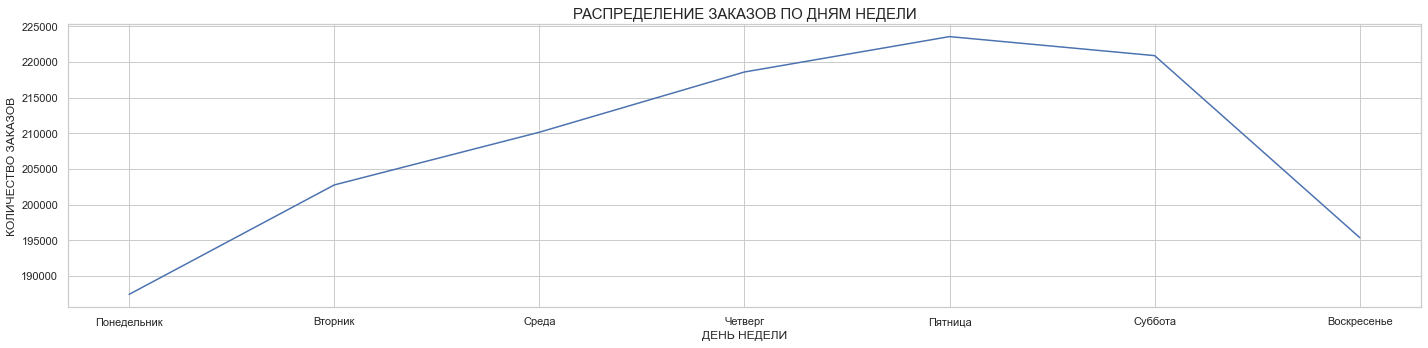

In [525]:
#Проанализируем распределения заказов по дням
fig = plt.figure()
fig.set_size_inches(20,5)
sns.lineplot(data=taxi_dataset.groupby('day_of_week')['id'].count(), palette='whitegrid')
plt.xticks(list(range(7)), ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.title('РАСПРЕДЕЛЕНИЕ ЗАКАЗОВ ПО ДНЯМ НЕДЕЛИ', fontsize=15)
plt.ylabel('КОЛИЧЕСТВО ЗАКАЗОВ')
plt.xlabel('ДЕНЬ НЕДЕЛИ')
#sns.dark_palette((20, 60, 50), input="husl")

fig.tight_layout()
plt.show()

In [526]:
#Выделим пары 10-ти самых загруженных дней недели и часа, подготовим таблицу для объединения с основным датасетом
right_side_to_merge = taxi_dataset.groupby(['day_of_week', 'hour'],as_index=False) \
                                .id.count() \
                                .sort_values(['id','hour', 'day_of_week'], ascending=False) \
                                .head(10) \
                                .reset_index(drop=True) \
                                [['day_of_week', 'hour']]

#Приведем наш параметр пикового значения трафика к бинарному виду, где 1-пиковое время заказа в категории день недели - время в дне, 0 - стандартное время
right_side_to_merge['traffic_jam'] = 1

#Объединение признаков с общим датасетом
processed_taxi_data = taxi_dataset.merge(right_side_to_merge, 
                                        on=['day_of_week', 'hour'], 
                                        how='left') \
                                        .fillna(0)
processed_taxi_data['traffic_jam'] = processed_taxi_data['traffic_jam'].astype(int)

processed_taxi_data


,id,vendor_id,hour,day_of_week,month,anomaly,passenger_count,distance_km,log_trip_duration,traffic_jam
0,id2875421,1,17,0,3,0,930.399753,1.500479,6.122493,0
1,id2377394,0,0,6,6,0,930.399753,1.807119,6.498282,0
2,id3858529,1,11,1,1,0,930.399753,6.392080,7.661527,0
3,id3504673,1,19,2,4,0,930.399753,1.487155,6.063785,1
4,id2181028,1,13,5,3,0,930.399753,1.189925,6.077642,0
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,1,13,4,4,0,1053.529749,1.226296,6.658011,0
1458640,id1049543,0,7,6,1,0,930.399753,6.056935,6.486161,0
1458641,id2304944,1,6,4,4,0,930.399753,7.832952,6.639876,0
1458642,id2714485,0,15,1,1,0,930.399753,1.093786,5.924256,0


In [527]:

#Выделяем в категориальную величину значения часа заказа 
encoder = OneHotEncoder()
right_side_to_merge_hours = pd.DataFrame(encoder.fit_transform(processed_taxi_data['hour']
                                                               .values \
                                                               .reshape(-1,1)) \
                                                               .toarray(), 
                                                                columns=[f'hour_{hour}' for hour in range(24)]) \
                                                                .astype(int)

#Выделяем в категориальную величину значения номера месяца в заказе
right_side_to_merge_months = pd.DataFrame(encoder.fit_transform(processed_taxi_data['month']
                                                                .values.reshape(-1,1))
                                                                .toarray(), 
                                                                columns=[f'month_{month}' for month in range(1,7)]) \
                                                                .astype(int)

#Объединяем категориальные признаки в одну таблицу
processed_taxi_data = processed_taxi_data.merge(right_side_to_merge_hours, 
                                                how='left', 
                                                left_index=True, 
                                                right_index=True)
processed_taxi_data = processed_taxi_data.merge(right_side_to_merge_months, 
                                                how='left', 
                                                right_index=True, 
                                                left_index=True)
processed_taxi_data.set_index('id', inplace=True)

processed_taxi_data


,vendor_id,hour,day_of_week,month,anomaly,passenger_count,distance_km,log_trip_duration,traffic_jam,hour_0,...,hour_20,hour_21,hour_22,hour_23,month_1,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,17,0,3,0,930.399753,1.500479,6.122493,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,0,6,6,0,930.399753,1.807119,6.498282,0,1,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,11,1,1,0,930.399753,6.392080,7.661527,0,0,...,0,0,0,0,1,0,0,0,0,0
id3504673,1,19,2,4,0,930.399753,1.487155,6.063785,1,0,...,0,0,0,0,0,0,0,1,0,0
id2181028,1,13,5,3,0,930.399753,1.189925,6.077642,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,13,4,4,0,1053.529749,1.226296,6.658011,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,7,6,1,0,930.399753,6.056935,6.486161,0,0,...,0,0,0,0,1,0,0,0,0,0
id2304944,1,6,4,4,0,930.399753,7.832952,6.639876,0,0,...,0,0,0,0,0,0,0,1,0,0


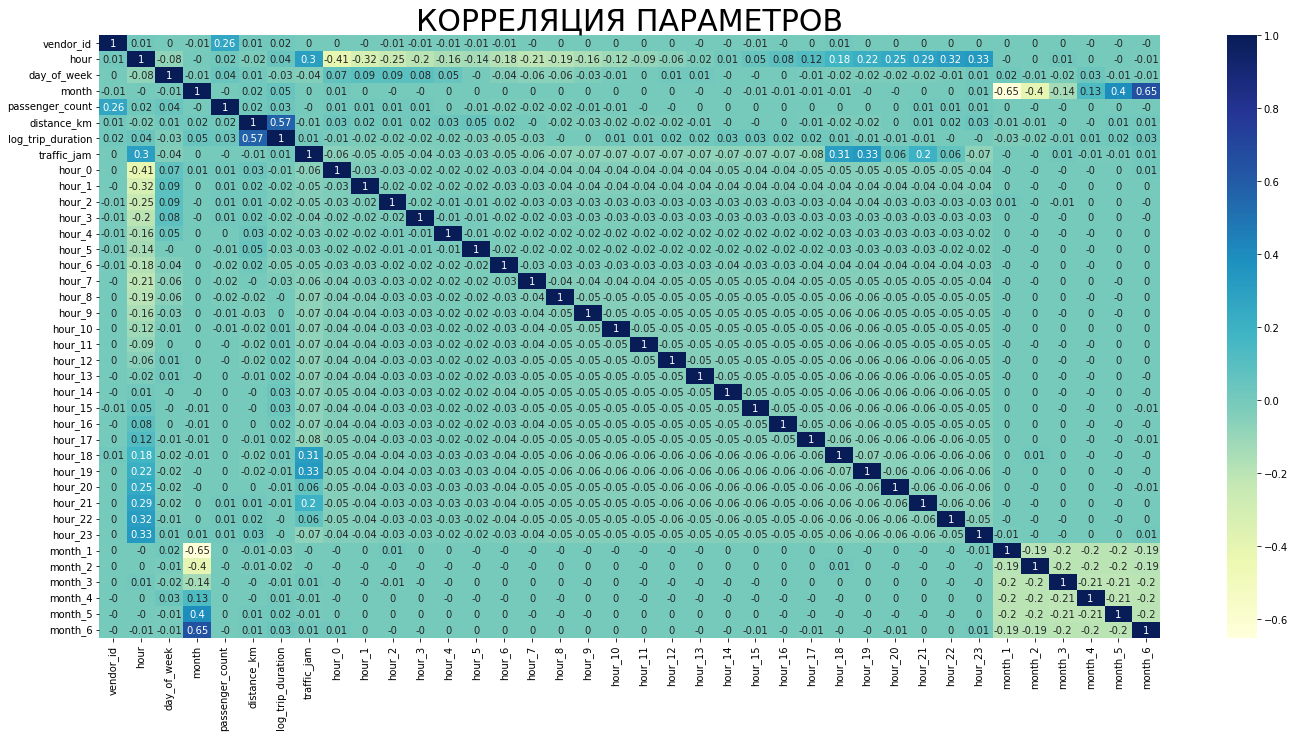

In [269]:
#Отобразим корреляционную матрицу текущих параметров
fig = plt.figure()
fig.set_size_inches(20,10)

sns.heatmap(processed_taxi_data \
                        .corr() \
                        .round(2), 
                        cmap='YlGnBu', 
                        annot=True)

fig.tight_layout()
plt.title('КОРРЕЛЯЦИЯ ПАРАМЕТРОВ', fontsize=30)
plt.show()

In [529]:
#Найдем 5 главных признаков для определения линейной регрессии предсказания целевого log_trip_duration, предположительное время расчета 4 мин
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
sfs.fit(processed_taxi_data.drop('log_trip_duration', axis=1),processed_taxi_data['log_trip_duration'])
most_important_columns = sfs.get_feature_names_out()

#Определим score и MSE модели на наиболее важных колонках
X = processed_taxi_data[most_important_columns]
y = processed_taxi_data['log_trip_duration']
model.fit(X, y)

print(f'Наиболее важные признаки для предсказания длительности поездки: {most_important_columns}')
print(f'Показатель предсказания model.score параметра продолжительности поездки log_trip_duration: {model.score(X, y).round(3)}')
print(f'Погрешность MSE : {np.mean((y-model.predict(X))**2).round(2)}')

Наиболее важные признаки для предсказания длительности поездки: ['month' 'distance_km' 'hour_4' 'hour_5' 'hour_6']
Показатель предсказания model.score параметра продолжительности поездки log_trip_duration: 0.34
Погрешность MSE : 0.42


СЛЕДУЮЩЕЕ ЗАДАНИЕ. РАБОТА С ПРОПУСКАМИ

In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [967]:
data = pd.read_csv(r"C:\Users\User\Downloads\247325 3 Часть (1)\8 ks_crashed.csv")
data

,Название,Главная категория,Валюта,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,USD,600.00,600.00
1,Me & You Coordinating Sunglasses- Optical Qual...,NaN,USD,502.00,10000.00
2,New Carts for Istanbul Street Food Vendors,Food,USD,2414.00,1400.00
3,New Improv Comedy Venue in Des Moines,Theater,USD,10030.88,10000.00
4,The Seer and the Sword,Film & Video,USD,0.00,10000.00
...,...,...,...,...,...
331670,Launch Ladies - A children's book about the Wo...,Publishing,USD,18808.00,9000.00
331671,TurnAround//The End Needs A Beginning Album Re...,Music,GBP,0.00,2501.45
331672,Celtic inspired band looking to move forward w...,Music,USD,0.00,1500.00
331673,Listening & Speaking in Virtual Reality: 5 Int...,Technology,NaN,200.00,NaN


In [970]:
data.isna().sum()

Название                  3
Главная категория     32906
Валюта                33200
Собрано в долларах        0
Цель в долларах       33143
dtype: int64

In [977]:
data['Валюта'] = data['Валюта'].fillna(data['Валюта'].value_counts()[0])
#data.isna().sum()

In [980]:
data['Главная категория'] = data['Главная категория'].fillna(data['Главная категория'].value_counts()[0])

In [982]:
data['Цель в долларах'] = data.groupby(['Главная категория','Валюта'])['Цель в долларах'].transform('mean')

In [983]:
data.isna().sum()

Название              3
Главная категория     0
Валюта                0
Собрано в долларах    0
Цель в долларах       0
dtype: int64

In [542]:
data[data['Валюта'] == 'USD'] = data[data['Валюта'] == 'USD'].fillna(data[data['Валюта'] == 'USD']['Цель в долларах'].mean().round())
datad

,Название,Главная категория,Валюта,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,USD,600.00,600.00
1,Me & You Coordinating Sunglasses- Optical Qual...,39756.0,USD,502.00,10000.00
2,New Carts for Istanbul Street Food Vendors,Food,USD,2414.00,1400.00
3,New Improv Comedy Venue in Des Moines,Theater,USD,10030.88,10000.00
4,The Seer and the Sword,Film & Video,USD,0.00,10000.00
...,...,...,...,...,...
331670,Launch Ladies - A children's book about the Wo...,Publishing,USD,18808.00,9000.00
331671,TurnAround//The End Needs A Beginning Album Re...,Music,GBP,0.00,2501.45
331672,Celtic inspired band looking to move forward w...,Music,USD,0.00,1500.00
331673,Listening & Speaking in Virtual Reality: 5 Int...,Technology,NaN,200.00,NaN


In [550]:
#Заполним пропущенные данные наименования категорий наиболее частым
data['Главная категория'] = data['Главная категория'].fillna(data['Главная категория'].value_counts().index[0])
data.isna().sum()


Название                  3
Главная категория         0
Валюта                33200
Собрано в долларах        0
Цель в долларах       33143
dtype: int64

In [551]:
data['Валюта'] = data['Валюта'].fillna('Неизвестная валюта')
data.isna().sum()

Название                  3
Главная категория         0
Валюта                    0
Собрано в долларах        0
Цель в долларах       33143
dtype: int64

In [553]:
data['Цель в долларах'] = data.groupby('Главная категория')['Цель в долларах'].transform('mean')
data.isna().sum()

Название              3
Главная категория     0
Валюта                0
Собрано в долларах    0
Цель в долларах       0
dtype: int64

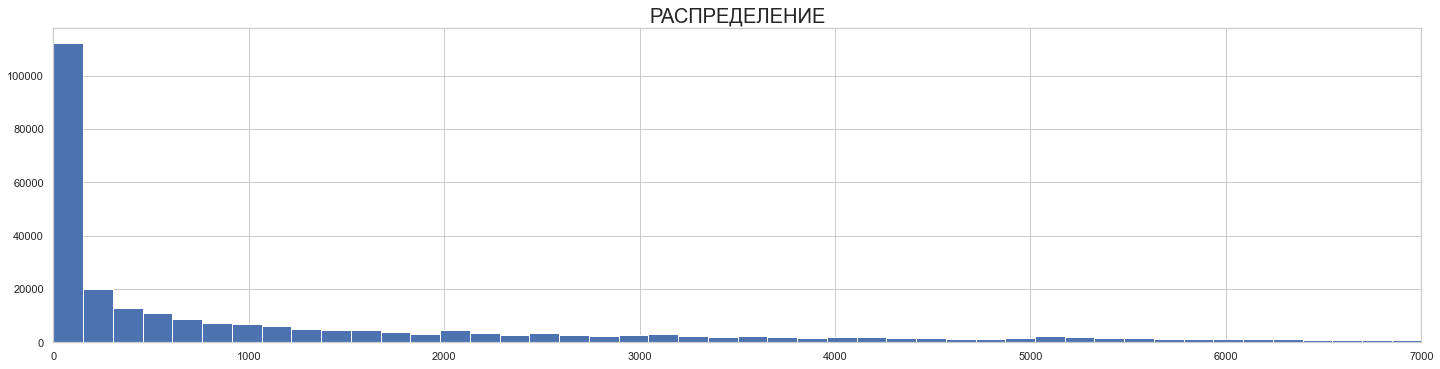

In [577]:
fig = plt.figure()
data['Собрано в долларах'][data['Собрано в долларах'] < data['Собрано в долларах'].quantile(0.9)].hist(figsize=(20,5), bins=100)
fig.tight_layout()
plt.xlim(0,7000)
plt.title('РАСПРЕДЕЛЕНИЕ', fontsize=20)
plt.show()

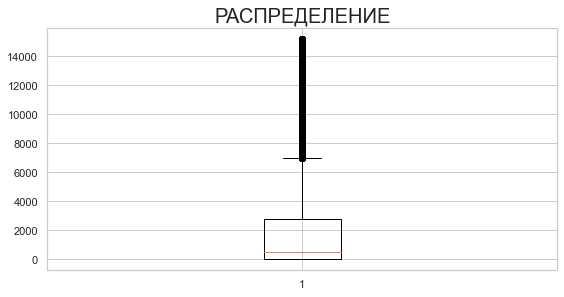

In [591]:
fig = plt.figure(figsize=(8,4))
#plt.boxplot(data['Собрано в долларах'])
plt.boxplot(data['Собрано в долларах'][data['Собрано в долларах'] < data['Собрано в долларах'].quantile(0.9)])
#plt.ylim(1000000)
fig.tight_layout()
#plt.xlim(0,7000)
plt.title('РАСПРЕДЕЛЕНИЕ', fontsize=20)
plt.show()

<AxesSubplot: >

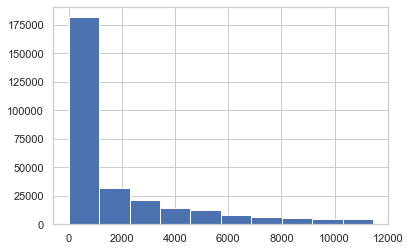

In [593]:
q_low = data['Собрано в долларах'].quantile(0.25)
q_high = data['Собрано в долларах'].quantile(0.75)
data[data['Собрано в долларах'] < (q_high + (q_high - q_low) * 1.5)]['Собрано в долларах'].hist()

TF-IDF

In [986]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [1008]:
data = data.dropna()
tfidf = TfidfVectorizer()
tfidf.fit(data['Название'])

TfidfVectorizer()

In [1034]:
pd.DataFrame(tfidf.transform([data['Название'][1]]).T.todense(), 
                            index=tfidf.get_feature_names_out(), 
                            columns=['tfidf']) \
                            .sort_values('tfidf', ascending=False) 
                            #.query('tfidf > 0')

#df = pd.DataFrame(tfidf.transform([first_document]).T.todense(),
#                  index=tfidf.get_feature_names(),
#                  columns=['tfidf'])


,tfidf
coordinating,0.515963
sunlens,0.515963
optical,0.411371
sunglasses,0.334657
quality,0.303763
...,...
frogpants,0.000000
frogmen,0.000000
frogmarch,0.000000
frogman,0.000000


In [1030]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(data['Название'])
pd.DataFrame(tfidf.transform([data['Название'][2]]).T.todense(),
                             tfidf.get_feature_names_out(), columns=['tfidf']) \
                            .sort_values('tfidf', ascending=False) \
                            .query('tfidf > 0')
                            

,tfidf
vendors,0.524374
carts,0.501111
istanbul,0.483670
street,0.315991
food,0.269107
new,0.195609
for,0.171611


In [1038]:
pd.DataFrame(tfidf.transform([data['Название'][2]]).T.todense().reshape(135398,-1, columns=['tfidf']))

TypeError: 'columns' is an invalid keyword argument for this function

In [1]:
data

NameError: name 'data' is not defined

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
data = pd.read_csv(r"C:\Users\User\Downloads\247325 3 Часть (1)\8 ks_crashed.csv")
data.dropna(inplace=True)
data

,Название,Главная категория,Валюта,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,USD,600.00,600.00
2,New Carts for Istanbul Street Food Vendors,Food,USD,2414.00,1400.00
3,New Improv Comedy Venue in Des Moines,Theater,USD,10030.88,10000.00
4,The Seer and the Sword,Film & Video,USD,0.00,10000.00
5,The Wild World of Ogots - YOU Become an Ogot (...,Publishing,USD,1305.00,1075.00
...,...,...,...,...,...
331669,Jared Horgan's Huge Opportunity,Music,USD,505.00,8000.00
331670,Launch Ladies - A children's book about the Wo...,Publishing,USD,18808.00,9000.00
331671,TurnAround//The End Needs A Beginning Album Re...,Music,GBP,0.00,2501.45
331672,Celtic inspired band looking to move forward w...,Music,USD,0.00,1500.00


In [15]:
data.isna().sum()


Название              0
Главная категория     0
Валюта                0
Собрано в долларах    0
Цель в долларах       0
dtype: int64

In [17]:
tfidf = TfidfVectorizer()
tfidf.fit(data['Название'])


TfidfVectorizer()

In [48]:
def vect(temp_str):
    return pd.DataFrame(tfidf.transform(temp_str).T.todense(),
                                                        tfidf.get_feature_names_out(), columns=['tfidf']) \
                                                        .sort_values('tfidf', ascending=False) \
                                                        .query('tfidf > 0').mean()[0].round(3)
data['Название'].apply(lambda x: vect([x]))

KeyboardInterrupt: 

In [672]:
def longest_unique_word(test_str):
    print(f'Изначальное слово : {test_str}')
    #Создаем список для итоговых слов
    words_list = []
    for j in set(test_str):
        #Разбиваем весь массив по задвоенным символам
        for i in test_str.replace(j, '*').split('*'):
            if len(set(i)) == len(i):
                #Возвращаем букву по которой выбрано разделение в начало слова
                print(str(j) + str(i))
                words_list.append(str(j) + str(i))
            else:
                print(f'Не прошло слово : {i}')

    print(f'Длина самого большой уникальной последовательности букв {len(max(words_list, key=len))+1}, эта последовательность {max(words_list, key=len)}')

In [674]:
longest_unique_word('fagagajfgadu gfagiruvovq revoqerbvqoebv roqjnlkjdfpiunpaiv')

Изначальное слово : fagagajfgadu gfagiruvovq revoqerbvqoebv roqjnlkjdfpiunpaiv
Не прошло слово : fagagajfgadu gfag
Не прошло слово : ruvovq revoqerbvqoebv roqjnlkjdfp
iunpa
iv
Не прошло слово : fagagajfgadu gfagi
Не прошло слово : uvovq 
Не прошло слово : evoqe
Не прошло слово : bvqoebv 
Не прошло слово : oqjnlkjdfpiunpaiv
af
ag
ag
ajfg
adu gf
Не прошло слово : giruvovq revoqerbvqoebv roqjnlkjdfpiunp
aiv
Не прошло слово : fagagajfgadu gfagiruvovq r
evoq
erbvqo
Не прошло слово : bv roqjnlkjdfpiunpaiv
Не прошло слово : fagagajfgadu gfagiruvovq revoqerbvqoebv roqj
nlkjdfpiu
npaiv
Не прошло слово : fagagajfgadu
Не прошло слово : gfagiruvovq
Не прошло слово : revoqerbvqoebv
Не прошло слово : roqjnlkjdfpiunpaiv
Не прошло слово : fagagajfgadu gfagiruv
Не прошло слово : vq rev
Не прошло слово : qerbvq
oebv r
Не прошло слово : qjnlkjdfpiunpaiv
Не прошло слово : fagagajfgadu gfagiruvovq revoqerbvqoebv roqjn
Не прошло слово : kjdfpiunpaiv
Не прошло слово : fagagajfgadu gfagiruvovq revoqerbvqoebv 

In [688]:
def longest_unique_substring(string):
    last_seen = {}
    start = 0
    max_len = 0
    max_start = 0

    for i, char in enumerate(string):
        if char in last_seen and last_seen[char] >= start:
            start = last_seen[char] + 1
        last_seen[char] = i
        if i - start + 1 > max_len:
            max_len = i - start + 1
            max_start = start

    return string[max_start:max_start + max_len]   
t = "abcedcxyz abcedc xyz abced cxyz"
print(longest_unique_substring(t))

edcxyz ab


In [696]:
def timer(func):
    def wrapper(*args, **kwargs):
        # import time
        # start the timer
        start_time = time.time()
        # call the decorated function
        result = func(*args, **kwargs)
        # remeasure the time
        end_time = time.time()
        # compute the elapsed time and print it
        execution_time = end_time - start_time
        print(f"Execution time: {execution_time} seconds")
        # return the result of the decorated function execution
        return result
    # return reference to the wrapper function
    return wrapper

In [697]:
import time
@timer
def train_model():
    print("Starting the model training function...")
    # simulate a function execution by pausing the program for 5 seconds
    time.sleep(1) 
    print("Model training completed!")

train_model() 

Starting the model training function...
Model training completed!
Execution time: 1.0080280303955078 seconds


In [709]:
def hello(func):
    def wrapper():
        caos = func(55, 1, 9)
        return caos
    return(wrapper)

In [813]:
taxi_analize = pd.read_csv(r"C:\Users\User\Downloads\processed_data_with_new_features.csv")
taxi_analize

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
0,id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,1,NaN,0,1.226296,6.658011,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1458640,id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458641,id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1458642,id2714485,0,930.399753,0,1.093786,5.924256,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [834]:
filtered_records = taxi_analize[
    (taxi_analize.log_trip_duration >= taxi_analize.log_trip_duration.quantile(0.005)) &
    (taxi_analize.log_trip_duration <= taxi_analize.log_trip_duration.quantile(0.995))
]

#filtered_records = filtered_records[filtered_records.distance_km < filtered_records.distance_km.quantile(0.995)]
filtered_records.passenger_count = filtered_records.passenger_count.fillna(filtered_records.passenger_count.mean())

filtered_records


C:\Users\User\AppData\Local\Temp\ipykernel_16544\1540566173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_records.passenger_count = filtered_records.passenger_count.fillna(filtered_records.passenger_count.mean())


,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
0,id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,id3858529,1,959.482237,0,6.392080,7.661527,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,id3504673,1,959.482237,0,1.487155,6.063785,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,1,959.482237,0,1.226296,6.658011,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1458640,id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458641,id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1458642,id2714485,0,930.399753,0,1.093786,5.924256,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [835]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_validate
import datetime as dt

y = filtered_records.drop('id', axis=1).log_trip_duration
X = filtered_records.drop(['log_trip_duration', 'id'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LassoCV()
cross_result = cross_validate(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
cross_result

{'fit_time': array([19.08252907, 18.61971283, 18.07618952, 18.49168062, 17.68972611]),
 'score_time': array([0.025002  , 0.024997  , 0.02899718, 0.02403402, 0.02500319]),
 'test_score': array([-0.37409824, -0.32134259, -0.31434904, -0.39415334, -0.31347863]),
 'train_score': array([-0.33209442, -0.34506243, -0.34695305, -0.32771583, -0.34724693])}

In [832]:
#Сравним с показателями модели без фильтра выбросов
taxi_analize.passenger_count = taxi_analize.passenger_count.fillna(taxi_analize.passenger_count.mean())
#Заполним пропущенные значения длины заказа средними значениями по дню недели
taxi_analize['distance_km'] = taxi_analize['distance_km'].fillna(taxi_analize.groupby(['day_of_week_1', 'day_of_week_2','day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6'])['distance_km'].transform('mean'))

y = taxi_analize.drop('id', axis=1).log_trip_duration
X = taxi_analize.drop(['log_trip_duration', 'id'], axis=1)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
model = LassoCV()

cross_result = cross_validate(model, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
cross_result

{'fit_time': array([19.95302987, 19.35474873, 18.4145093 , 21.82699919, 18.52962708]),
 'score_time': array([0.02497053, 0.02800035, 0.02700186, 0.02499938, 0.02600121]),
 'test_score': array([-0.46383906, -0.40967874, -0.40533711, -0.48514533, -0.40115282]),
 'train_score': array([-0.42166717, -0.43497842, -0.43620459, -0.41691294, -0.43732666])}

In [833]:
#Сравним с показателями модели без фильтра выбросов
taxi_analize.passenger_count = taxi_analize.passenger_count.fillna(taxi_analize.passenger_count.mean())
#Заполним пропущенные значения длины заказа средними значениями по дню недели
taxi_analize['distance_km'] = taxi_analize['distance_km'].fillna(taxi_analize.groupby(['day_of_week_1', 'day_of_week_2','day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6'])['distance_km'].transform('mean'))

y = taxi_analize.drop('id', axis=1).log_trip_duration
X = taxi_analize.drop(['log_trip_duration', 'id'], axis=1)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
model = LassoCV()

cross_result = cross_validate(model, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
cross_result

{'fit_time': array([16.2280612 , 15.95366573, 16.26234412, 15.67999649, 16.01179218]),
 'score_time': array([0.07796431, 0.08002949, 0.07703376, 0.07803249, 0.08299971]),
 'test_score': array([-0.46584895, -0.41274295, -0.40871598, -0.48672702, -0.40499927]),
 'train_score': array([-0.42452588, -0.43782627, -0.43902893, -0.41979383, -0.44015452])}

In [826]:
X = taxi_analize.drop(['log_trip_duration', 'id'], axis=1)
X

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
0,1,930.399753,0,1.500479,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,930.399753,0,1.807119,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,959.482237,0,6.392080,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,959.482237,0,1.487155,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,930.399753,0,1.189925,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,1,959.482237,0,1.226296,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1458640,0,930.399753,0,6.056935,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458641,1,930.399753,0,7.832952,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1458642,0,930.399753,0,1.093786,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [831]:
X = filtered_records.drop(['log_trip_duration', 'id'], axis=1)
X['distance_km'] = X['distance_km'].fillna(X.groupby(['day_of_week_1', 'day_of_week_2','day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6'])['distance_km'].transform('mean'))
X.isna().sum()
                            

vendor_id             0
passenger_count       0
store_and_fwd_flag    0
distance_km           0
anomaly               0
traffic_jam           0
day_of_week_1         0
day_of_week_2         0
day_of_week_3         0
day_of_week_4         0
day_of_week_5         0
day_of_week_6         0
hour_1                0
hour_2                0
hour_3                0
hour_4                0
hour_5                0
hour_6                0
hour_7                0
hour_8                0
hour_9                0
hour_10               0
hour_11               0
hour_12               0
hour_13               0
hour_14               0
hour_15               0
hour_16               0
hour_17               0
hour_18               0
hour_19               0
hour_20               0
hour_21               0
hour_22               0
hour_23               0
month_2               0
month_3               0
month_4               0
month_5               0
month_6               0
dtype: int64

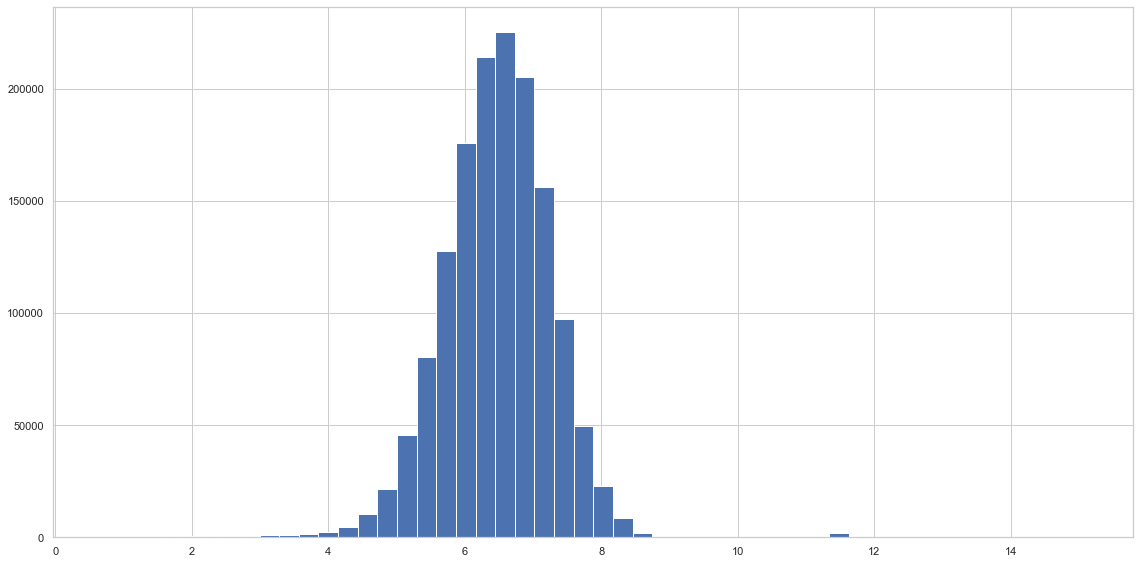

In [756]:
taxi_analize.log_trip_duration.hist(figsize=(16,8),bins=50)
plt.tight_layout()

In [757]:
taxi_analize.log_trip_duration.describe()

count    1.458644e+06
mean     6.466978e+00
std      7.957595e-01
min      6.931472e-01
25%      5.986452e+00
50%      6.496775e+00
75%      6.981006e+00
max      1.507575e+01
Name: log_trip_duration, dtype: float64

<AxesSubplot: >

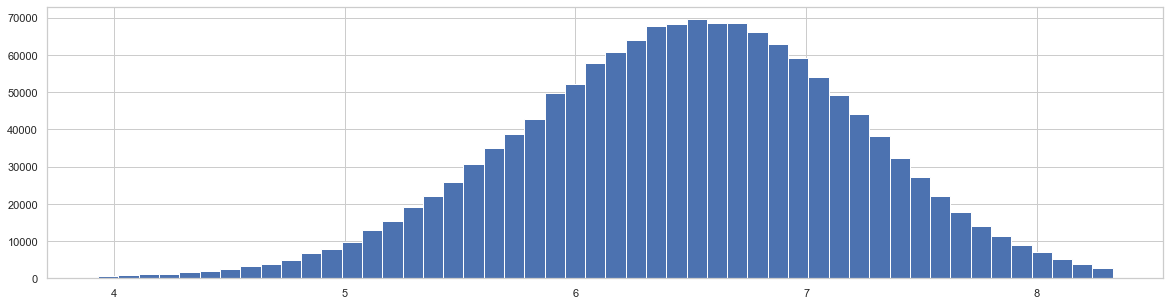

In [811]:
filtered_records = taxi_analize.log_trip_duration[
    (taxi_analize.log_trip_duration >= taxi_analize.log_trip_duration.quantile(0.005)) &
    (taxi_analize.log_trip_duration <= taxi_analize.log_trip_duration.quantile(0.995))
]
plt.tight_layout()
filtered_records.hist(figsize=(20, 5), bins=50)


In [788]:
filtered_records.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1458634, 1458635, 1458636, 1458637, 1458638, 1458639, 1458640,
            1458641, 1458642, 1458643],
           dtype='int64', length=1444166)

ЗАДАЧА ПРЕДСКАЗАНИЕ ЦЕНЫ ЖИЛЬЯ СБЕРБАНК KAGGLE

In [844]:
train = pd.read_csv(r"C:\Users\User\Downloads\train.csv")
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [861]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_validate
import datetime as dt
import numpy as np

In [863]:
train = pd.read_csv(r"C:\Users\User\Downloads\train.csv")

train.timestamp = train.timestamp.astype('datetime64[D]')
train.price_doc = np.log1p(train.price_doc).round(2)
train.rename(columns={'price_doc': 'log_price_doc'})
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,15.58
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,15.61
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,15.56
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,16.39
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,15.82
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,17.03
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,15.76
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,16.42


In [864]:
train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,15.609469
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,0.604287
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.510000
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,15.370000
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,15.650000
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,15.930000
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,18.530000


In [880]:
filtered_train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,15.58
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,15.61
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,15.56
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,16.39
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,15.82
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,17.03
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,15.76
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,16.42


In [883]:
filtered_train = train.loc[ : , train.dtypes != 'object']
for col in filtered_train.columns:
    filtered_train[col] = filtered_train[col].fillna(filtered_train[col].mean())
filtered_train

C:\Users\User\AppData\Local\Temp\ipykernel_16544\3552904903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train[col] = filtered_train[col].fillna(filtered_train[col].mean())


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,9,4,0,13,22,1,0,52,4,15.58
1,2,2011-08-23,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,15,3,0,15,29,1,10,66,14,15.61
2,3,2011-08-27,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,10,3,0,11,27,0,4,67,10,15.56
3,4,2011-09-01,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,11,2,1,4,4,0,0,26,3,16.39
4,5,2011-09-05,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,319,108,17,135,236,2,91,195,14,16.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,...,15,5,0,15,26,1,2,84,6,15.82
30467,30470,2015-06-30,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,...,313,128,24,98,182,1,82,171,15,17.03
30468,30471,2015-06-30,45,34.403271,10.0,20.000000,1.000000,3068.057097,1.000000,1.000000,...,1,1,0,2,12,0,1,11,1,15.76
30469,30472,2015-06-30,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,...,22,1,1,6,31,1,4,65,7,16.42


In [884]:
filtered_train.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_16544\1465081623.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtered_train.corr()


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,1.000000,0.021447,0.012953,-0.022441,0.004010,0.004848,-0.006488,0.008200,-0.005935,-0.061480,...,0.018635,0.022958,0.023704,0.012813,0.015181,-0.048797,0.020671,-0.011680,-0.025627,0.144181
full_sq,0.021447,1.000000,0.153837,0.089450,0.057390,0.015820,-0.002532,0.334760,0.009640,-0.038544,...,0.039083,0.040059,0.043560,0.026895,0.028579,0.021568,0.030218,0.001580,-0.041254,0.271621
life_sq,0.012953,0.153837,1.000000,0.038603,0.034483,0.010200,-0.002324,0.169211,0.000651,-0.058546,...,0.024240,0.026800,0.029921,0.014980,0.015187,0.008870,0.019099,-0.012124,-0.043462,0.120119
floor,-0.022441,0.089450,0.038603,1.000000,0.373873,-0.007439,0.000855,-0.004654,-0.006957,-0.083337,...,-0.034680,-0.029541,-0.022228,-0.044265,-0.045475,-0.012222,-0.044093,-0.101769,-0.123534,0.117991
max_floor,0.004010,0.057390,0.034483,0.373873,1.000000,0.045915,-0.000215,-0.014220,0.020345,-0.061203,...,-0.033935,-0.028423,-0.024940,-0.040653,-0.040605,-0.048229,-0.040977,-0.083772,-0.094960,0.078761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mosque_count_5000,-0.048797,0.021568,0.008870,-0.012222,-0.048229,0.041689,0.014699,0.051980,0.010915,0.068570,...,0.529434,0.492859,0.481481,0.502028,0.550342,1.000000,0.499376,0.518500,0.242078,0.130882
leisure_count_5000,0.020671,0.030218,0.019099,-0.044093,-0.040977,0.037472,-0.000601,0.049396,-0.005270,-0.002915,...,0.986206,0.975462,0.948391,0.969029,0.975259,0.499376,1.000000,0.809169,0.463053,0.134287
sport_count_5000,-0.011680,0.001580,-0.012124,-0.101769,-0.083772,0.082620,0.004257,0.075427,0.014149,0.143328,...,0.824139,0.778770,0.753384,0.825883,0.847771,0.518500,0.809169,1.000000,0.733897,0.223552
market_count_5000,-0.025627,-0.041254,-0.043462,-0.123534,-0.094960,0.063992,0.005333,0.051672,0.022122,0.203451,...,0.432265,0.380154,0.353270,0.482547,0.514344,0.242078,0.463053,0.733897,1.000000,0.162637


In [898]:
pd.DataFrame(filtered_train.corr() \
            .abs() \
            .unstack()) \
            .reset_index() \
            .query('level_0 != level_1') \
            .rename(columns={0:'corr'}).sort_values('corr', ascending=False) \
            .query('corr < 0.8')
            

C:\Users\User\AppData\Local\Temp\ipykernel_16544\352393196.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(filtered_train.corr() \


,level_0,level_1,corr
45460,trc_count_1000,cafe_count_1500_price_1500,0.799964
54260,cafe_count_1500_price_1500,trc_count_1000,0.799964
54916,cafe_count_1500_price_4000,cafe_count_5000_price_high,0.799949
74166,cafe_count_5000_price_high,cafe_count_1500_price_4000,0.799949
41934,cafe_count_500_price_2500,cafe_count_5000,0.799602
...,...,...,...
3870,children_preschool,build_year,0.000018
1670,build_year,children_preschool,0.000018
1697,build_year,0_6_all,0.000018
38670,office_sqm_500,male_f,0.000003


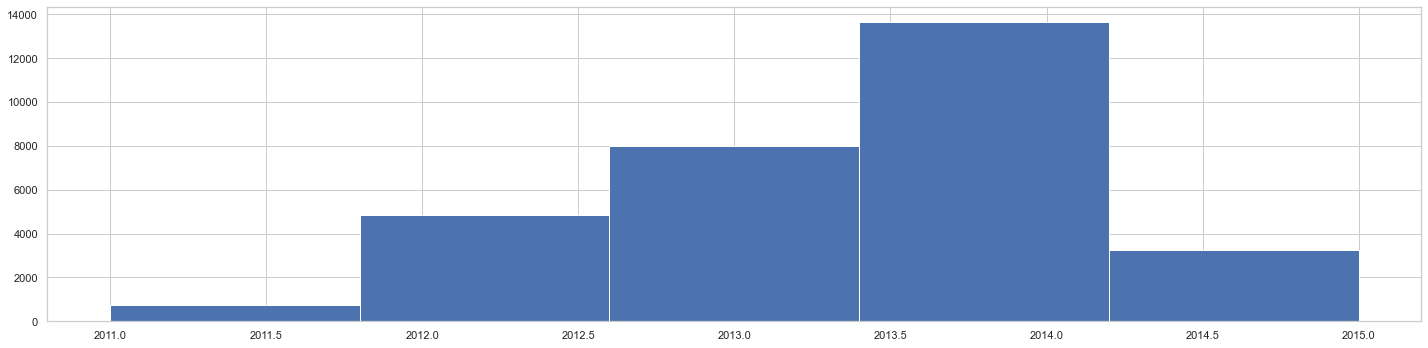

In [860]:
train.timestamp.dt.year.hist(bins=5,figsize=(20,5))
plt.tight_layout()

In [ ]:
def get_redundant_pairs(df):
    pairs_to_drop = set() 
    cols = filtered_train.columns 
    for i in range(0, filtered_train.shape[l]): 
        for j in range(0, i+l):
            pairs_to_drop.add((cols[i], cols[j])) 
    return pairs_to_drop 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack() 
    labels_to_drop = get_redundant_pairs(df) 
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False) 
    return au_corr[0:n]

print("Top Absolute Correlations") 
print(get_top_abs_correlations(df[numeric_columns], 50)) #выведем топ 50 коррелирующих пар 

In [956]:
filtered_train.day = filtered_train.timestamp.astype('datetime64[D]').dt.day
filtered_train.month = filtered_train.timestamp.astype('datetime64[m]').dt.month
filtered_train = filtered_train.drop('timestamp', axis=1)
filtered_train.shape


C:\Users\User\AppData\Local\Temp\ipykernel_16544\1358910411.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  filtered_train.day = filtered_train.timestamp.astype('datetime64[D]').dt.day
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1358910411.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  filtered_train.month = filtered_train.timestamp.astype('datetime64[m]').dt.month


(30471, 276)

In [959]:
from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(filtered_train)
constant_cols = [x for x in filtered_train if x not in cutter.get_feature_names_out()]
filtered_train[constant_cols].shape


(30471, 8)

In [960]:
filtered_train[constant_cols]

,green_zone_part,indust_part,green_zone_km,cafe_count_500_price_high,mosque_count_500,mosque_count_1000,mosque_count_1500,mosque_count_2000
0,0.189727,0.000070,0.600973,0,0,0,0,0
1,0.372602,0.049637,0.065321,0,0,0,0,0
2,0.112560,0.118537,0.453172,0,0,0,0,0
3,0.194703,0.069753,0.106125,0,0,0,0,0
4,0.015234,0.037316,0.236214,0,0,0,0,0
...,...,...,...,...,...,...,...,...
30466,0.096270,0.300323,0.139814,0,0,0,0,1
30467,0.065444,0.000078,0.271861,0,0,0,0,0
30468,0.496315,0.007122,0.427248,0,0,0,0,0
30469,0.167526,0.093443,0.227547,0,0,0,0,0


In [962]:
train.describe(include='object')

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


In [966]:
train.culture_objects_top_25.value_counts()

no     28543
yes     1928
Name: culture_objects_top_25, dtype: int64

In [54]:
data['Валюта'].astype('category')

0         USD
2         USD
3         USD
4         USD
5         USD
         ... 
331669    USD
331670    USD
331671    GBP
331672    USD
331674    USD
Name: Валюта, Length: 241890, dtype: category
Categories (14, object): ['AUD', 'CAD', 'CHF', 'DKK', ..., 'NZD', 'SEK', 'SGD', 'USD']

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [145]:
data = pd.read_csv(r"C:\Users\User\Downloads\247325 3 Часть (1)\10 banking.csv")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [126]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [127]:
data.corr().style.background_gradient(cmap='RdPu')


C:\Users\User\AppData\Local\Temp\ipykernel_16268\2698054645.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient(cmap='RdPu')


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [128]:
pd.DataFrame(data.corr().unstack() \
                        .sort_values(ascending=False)) \
                        .reset_index() \
                        .rename(columns={0:'corr'}) \
                        .query('level_0 !=level_1 & corr > 0.8' ) \
                        .style.background_gradient(cmap='RdPu')

C:\Users\User\AppData\Local\Temp\ipykernel_16268\1454958213.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(data.corr().unstack() \


,level_0,level_1,corr
11,euribor3m,emp_var_rate,0.972245
12,emp_var_rate,euribor3m,0.972245
13,nr_employed,euribor3m,0.945154
14,euribor3m,nr_employed,0.945154
15,nr_employed,emp_var_rate,0.906970
16,emp_var_rate,nr_employed,0.906970


C:\Users\User\AppData\Local\Temp\ipykernel_16268\868696417.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().round(2), annot=True, cmap='YlGnBu')


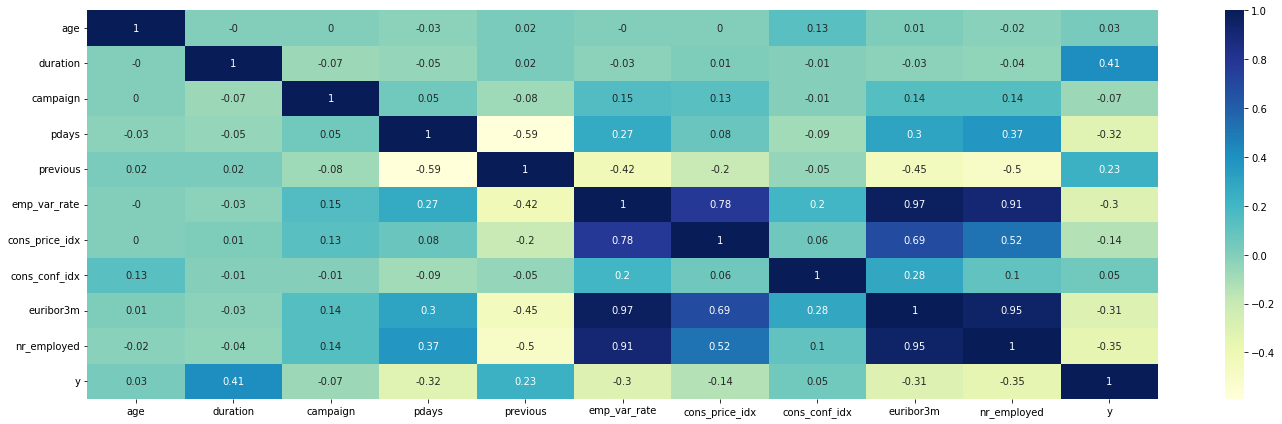

In [129]:
plt.figure(figsize=(20,6))
sns.heatmap(data.corr().round(2), annot=True, cmap='YlGnBu')
plt.tight_layout()

In [130]:
### Секретные функции для фильтрации признаков

def get_redundant_pairs(data):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

numeric_columns = data.loc[:, data.dtypes != 'object']
print("Top Absolute Correlations")
print(get_top_abs_correlations(numeric_columns, 10))

Top Absolute Correlations
emp_var_rate    euribor3m         0.972245
euribor3m       nr_employed       0.945154
emp_var_rate    nr_employed       0.906970
                cons_price_idx    0.775334
cons_price_idx  euribor3m         0.688230
pdays           previous          0.587514
cons_price_idx  nr_employed       0.522034
previous        nr_employed       0.501333
                euribor3m         0.454494
                emp_var_rate      0.420489
dtype: float64


In [131]:
from sklearn.feature_selection import VarianceThreshold
cutter = VarianceThreshold(threshold=0.1)
cutter.fit(test_data)
cutter.get_feature_names_out()

array(['age', 'duration', 'campaign', 'pdays', 'previous',
       'cons_price_idx', 'cons_conf_idx', 'nr_employed'], dtype=object)

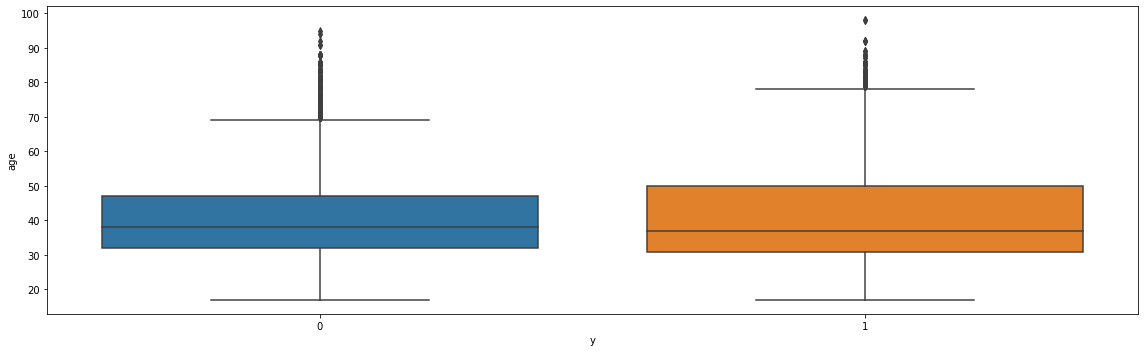

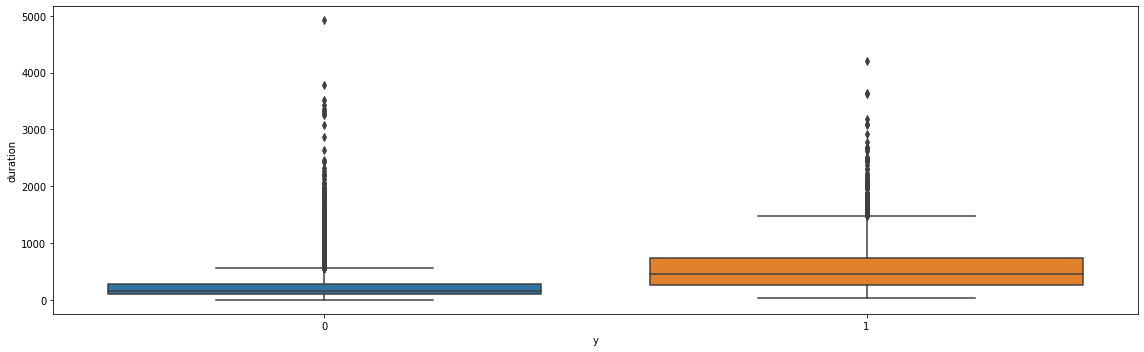

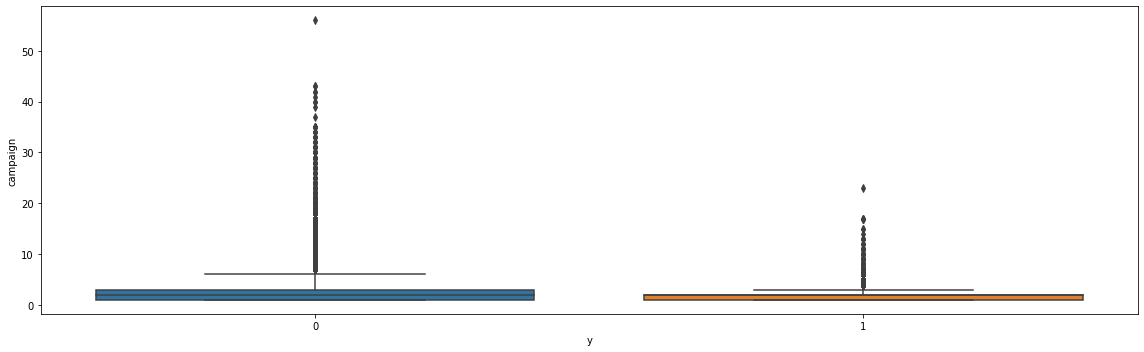

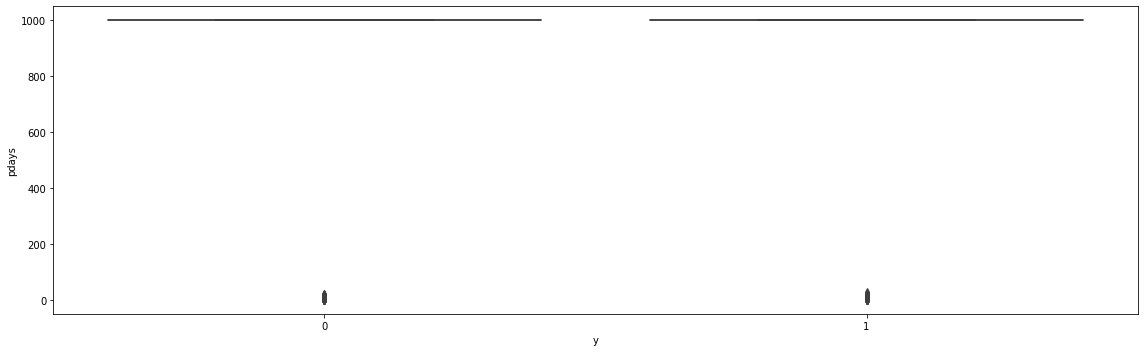

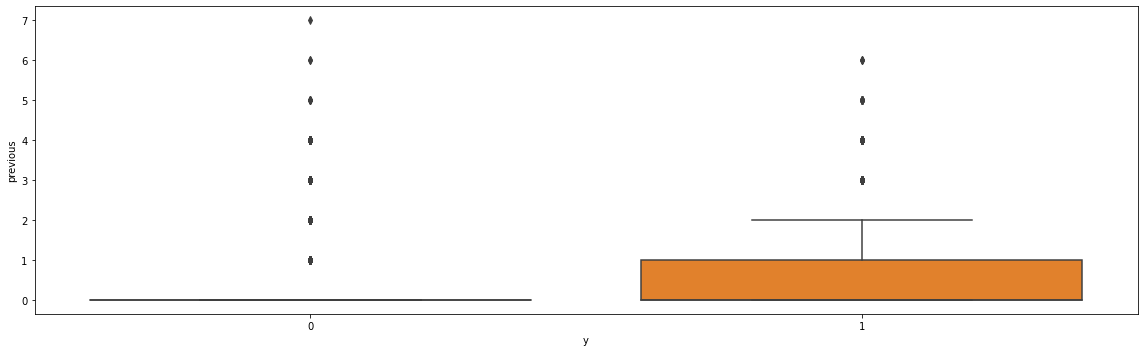

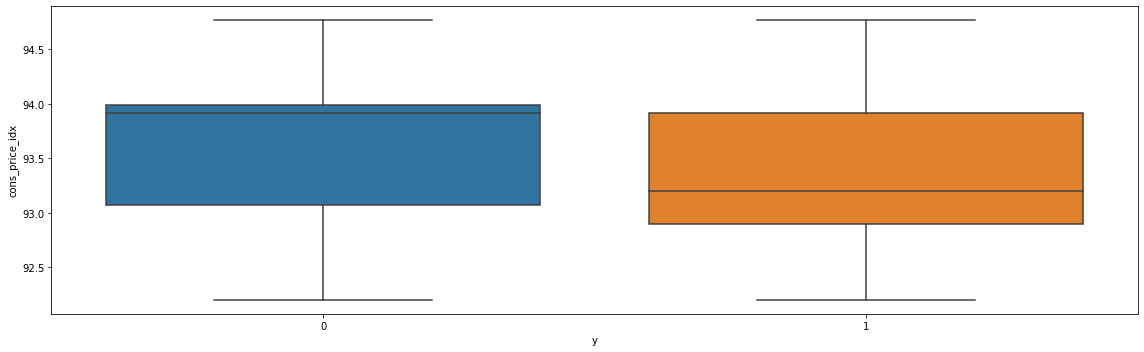

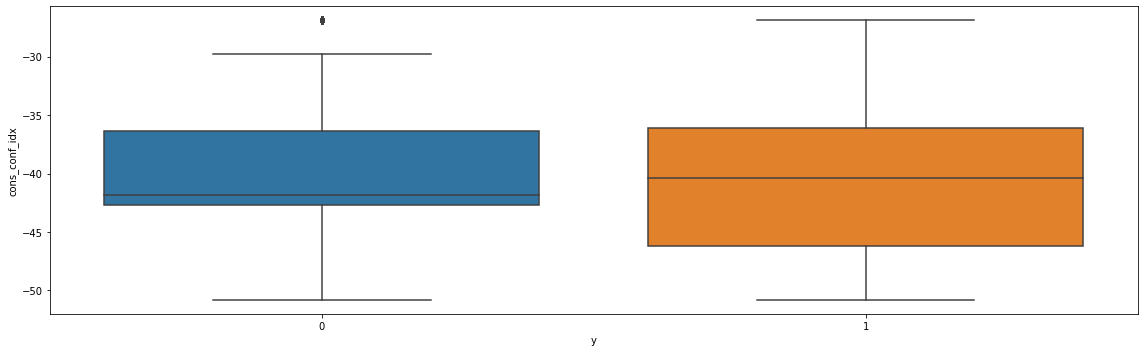

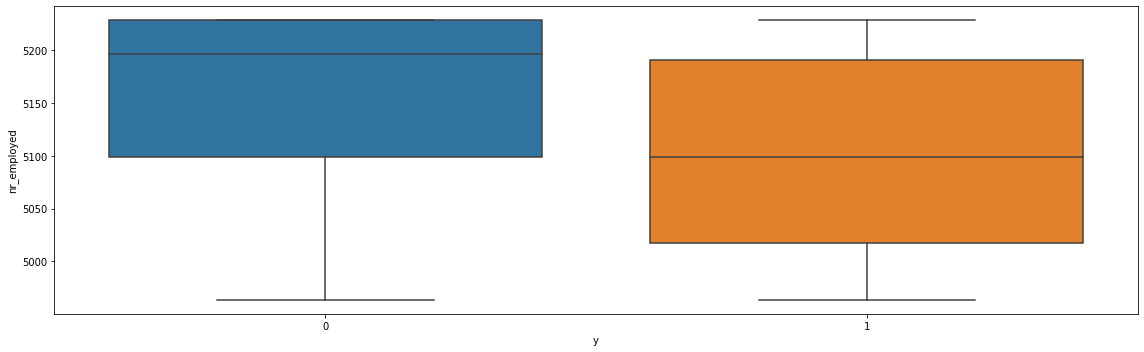

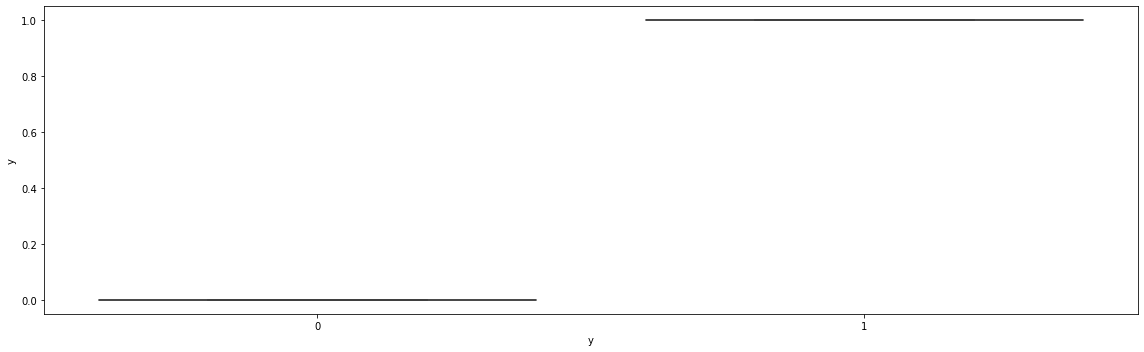

In [84]:
for i in test_data.columns:
    plt.figure(figsize=(16,5))
    sns.boxplot(x=test_data['y'], y=test_data[i])
    plt.tight_layout()

<Figure size 1440x504 with 0 Axes>

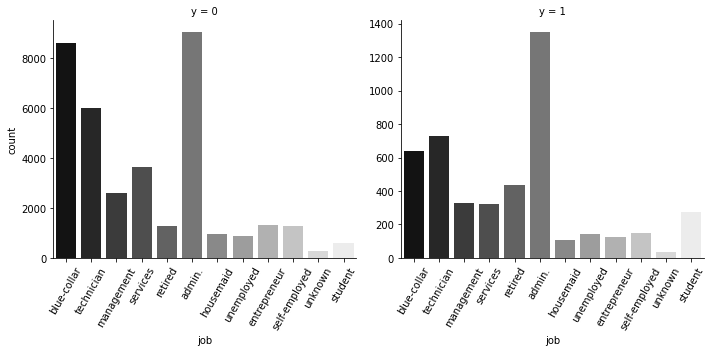

<Figure size 1440x504 with 0 Axes>

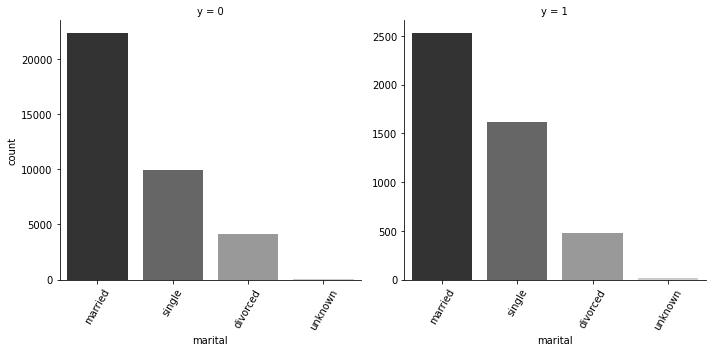

<Figure size 1440x504 with 0 Axes>

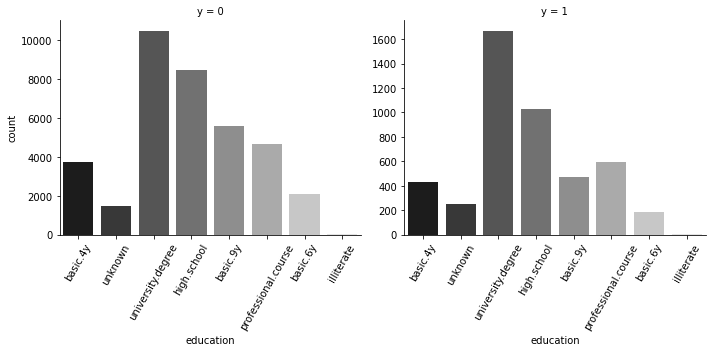

<Figure size 1440x504 with 0 Axes>

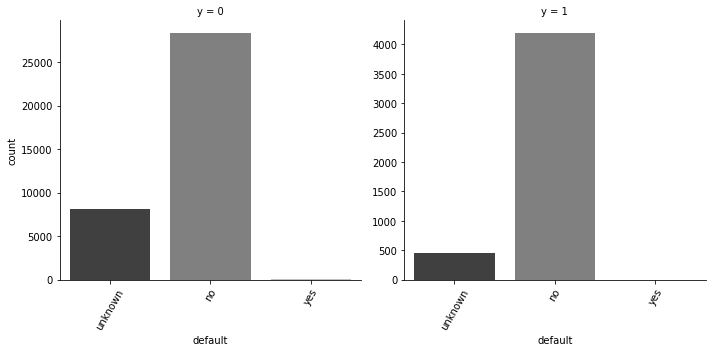

<Figure size 1440x504 with 0 Axes>

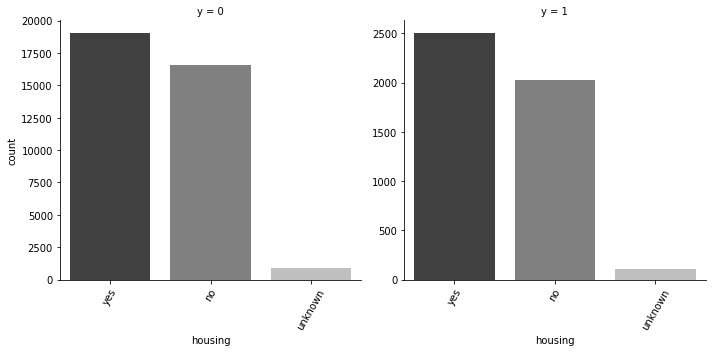

<Figure size 1440x504 with 0 Axes>

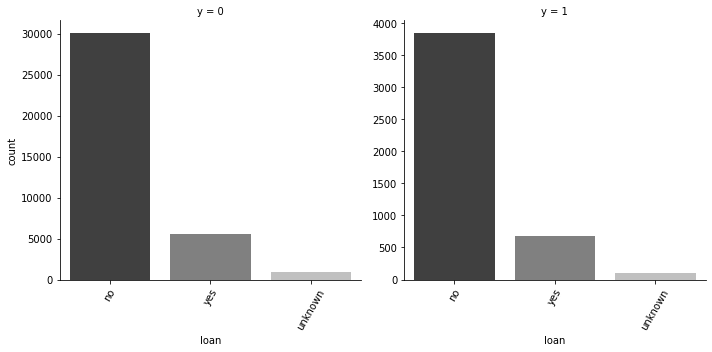

<Figure size 1440x504 with 0 Axes>

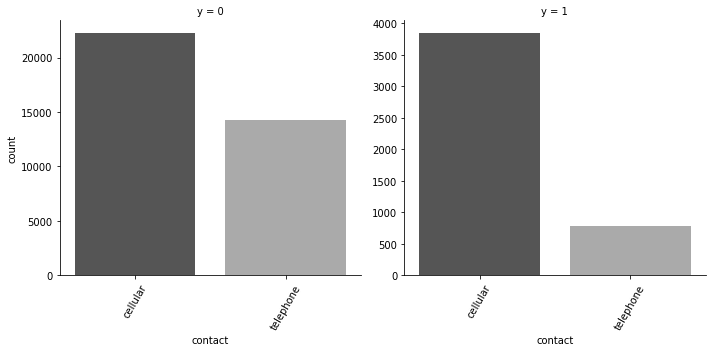

<Figure size 1440x504 with 0 Axes>

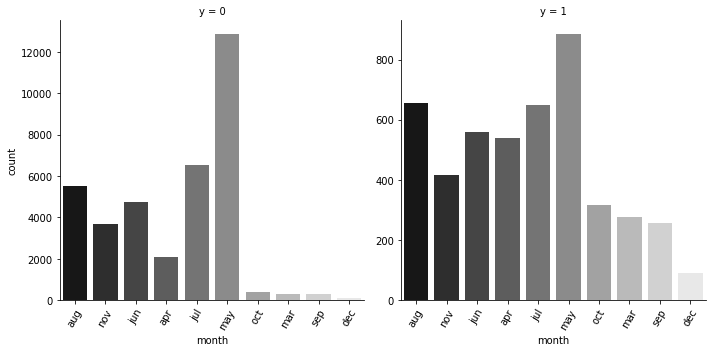

<Figure size 1440x504 with 0 Axes>

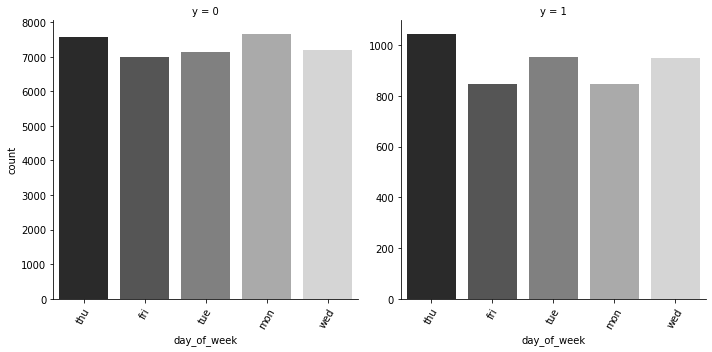

<Figure size 1440x504 with 0 Axes>

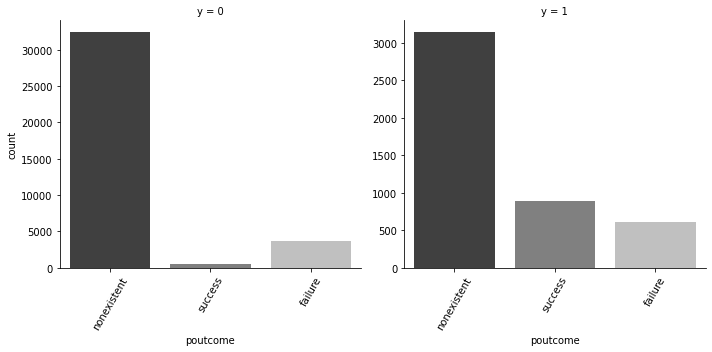

In [99]:
categorical_columns = data.loc[:,data.dtypes == 'object']
for i in categorical_columns.columns:
    custom_palette = ["#FF0000", "#00FF00", "#0000FF"]
    plt.figure(figsize=(20,7))
    sns.catplot(x=i, col='y', 
                data=data, 
                kind='count', 
                sharey=False, 
                palette='gray') \
                .set_xticklabels(rotation=60)
    plt.tight_layout()
    

In [141]:
data.columns

Index(['age', 'job', 'education', 'default', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [147]:
data.drop(['loan', 'housing', 'marital'], axis=1, inplace=True)
categorical_columns.drop(['loan', 'housing', 'marital'], axis=1, inplace=True)
data

KeyError: "['loan', 'housing', 'marital'] not found in axis"

In [142]:
categorical_columns.describe()

,job,education,default,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188
unique,12,8,3,2,10,5,3
top,admin.,university.degree,no,cellular,may,thu,nonexistent
freq,10422,12168,32588,26144,13769,8623,35563


In [117]:
for i in ['job', 'education', 'default', 'contact', 'month', 'day_of_week', 'poutcome', 'y']:
    data[i] = data[i].map(data.groupby(i)['y'].mean())
data

,age,job,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,0.068943,0.102490,0.05153,0.147376,0.106021,0.121188,210,1,999,0,0.088322,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,0.108260,0.145003,0.12879,0.147376,0.101439,0.108087,138,1,999,0,0.088322,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,0.112175,0.137245,0.12879,0.147376,0.105115,0.121188,339,3,6,2,0.651129,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,0.081381,0.108355,0.12879,0.147376,0.204787,0.108087,185,2,999,0,0.088322,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,0.252326,0.102490,0.12879,0.147376,0.106021,0.108087,137,1,3,1,0.651129,-2.9,92.201,-31.4,0.869,5076.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,0.252326,0.108355,0.05153,0.052313,0.105115,0.121188,222,1,999,0,0.088322,1.4,94.465,-41.8,4.866,5228.1,0.0
41184,31,0.100000,0.102490,0.05153,0.052313,0.064347,0.121188,196,2,999,0,0.088322,1.1,93.994,-36.4,4.860,5191.0,0.0
41185,42,0.129726,0.137245,0.05153,0.052313,0.064347,0.116671,62,3,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0.0
41186,48,0.108260,0.113485,0.12879,0.052313,0.438719,0.117800,200,2,999,0,0.088322,-3.4,92.431,-26.9,0.742,5017.5,0.0


In [146]:
for col in categorical_columns.columns:
    if data[col].nunique() < 5:
        right_side_to_merge = pd.get_dummies(data[col], drop_first=True, prefix=col)
        data = pd.concat((data.drop(col, axis=1), right_side_to_merge), axis=1)
    else:
        data[col] = data[col].map(data.groupby(col)['y'].mean())

data

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,...,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,default_unknown,default_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,44,0.068943,married,0.102490,yes,no,0.106021,0.121188,210,1,...,93.444,-36.1,4.963,5228.1,0,1,0,0,1,0
1,53,0.108260,married,0.145003,no,no,0.101439,0.108087,138,1,...,93.200,-42.0,4.021,5195.8,0,0,0,0,1,0
2,28,0.112175,single,0.137245,yes,no,0.105115,0.121188,339,3,...,94.055,-39.8,0.729,4991.6,1,0,0,0,0,1
3,39,0.081381,married,0.108355,no,no,0.204787,0.108087,185,2,...,93.075,-47.1,1.405,5099.1,0,0,0,0,1,0
4,55,0.252326,married,0.102490,yes,no,0.106021,0.108087,137,1,...,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,0.252326,married,0.108355,no,yes,0.105115,0.121188,222,1,...,94.465,-41.8,4.866,5228.1,0,1,0,1,1,0
41184,31,0.100000,married,0.102490,no,no,0.064347,0.121188,196,2,...,93.994,-36.4,4.860,5191.0,0,1,0,1,1,0
41185,42,0.129726,single,0.137245,yes,yes,0.064347,0.116671,62,3,...,93.994,-36.4,4.857,5191.0,0,1,0,1,1,0
41186,48,0.108260,married,0.113485,no,yes,0.438719,0.117800,200,2,...,92.431,-26.9,0.742,5017.5,0,0,0,1,1,0


In [162]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data['y'], test_size=0.2, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('LogReg', LogisticRegression(penalty='none'))])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(pipe.classes_)
print(pipe.predict(X_test.head(1)))
print(pipe.predict_proba(X_test.head(1)))
print(pipe.decision_function(X_test.head(2)))


0.9133284777858703
[0 1]
[0]
[[0.94813738 0.05186262]]
[-2.90590119 -1.04866716]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [282]:
import re
test_string = 'asdafsfgfadgf88.9adgf99a9gfdag sdhf.sfgh'
#re.search(r'\s\w+.\w', test_string)
re.search(r'\d+\W\d',test_string)


<re.Match object; span=(13, 17), match='88.9'>

In [1]:
import pandas as pd

train_data = pd.read_csv(r"C:\Users\User\Downloads\train.csv")
train_data

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [290]:
train_data.loc[:,train_data.dtypes != 'object'].describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [311]:
precentage = train_data.isna().sum() / train_data.shape[0]
precentage[precentage > 0].sort_values(ascending=False)

hospital_beds_raion                      0.473926
build_year                               0.446490
state                                    0.444980
cafe_sum_500_max_price_avg               0.435857
cafe_sum_500_min_price_avg               0.435857
cafe_avg_price_500                       0.435857
max_floor                                0.314135
material                                 0.314135
num_room                                 0.314135
kitch_sq                                 0.314135
preschool_quota                          0.219487
school_quota                             0.219389
cafe_avg_price_1000                      0.214105
cafe_sum_1000_max_price_avg              0.214105
cafe_sum_1000_min_price_avg              0.214105
life_sq                                  0.209478
raion_build_count_with_builddate_info    0.163795
build_count_after_1995                   0.163795
build_count_1946-1970                    0.163795
build_count_1921-1945                    0.163795


In [70]:
import pandas as pd
train_data_10 = pd.read_csv(r"C:\Users\User\Downloads\247325 3 Часть (1)\10_train.csv")
train_data_10

C:\Users\User\AppData\Local\Temp\ipykernel_22156\1181873734.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data_10 = pd.read_csv(r"C:\Users\User\Downloads\247325 3 Часть (1)\10_train.csv")


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,05c15aa6487f9710169e37c749a10441,win8defender,1.1.15100.1,4.18.1807.18075,1.273.894.0,0,0.0,1,NaN,3371.0,...,28487.0,1,0.0,0.0,0,0,0.0,0.0,3.0,0
199996,05c15b7b1b0f9f19a3279eee6572b3cd,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1234.0,0,7.0,0,NaN,53447.0,...,46942.0,0,NaN,0.0,0,0,1.0,0.0,15.0,0
199997,05c15e17f59c0e298c06dea9ed3a3ab4,win8defender,1.1.15000.2,4.18.1806.18062,1.271.1198.0,0,7.0,0,NaN,62773.0,...,12463.0,1,NaN,0.0,0,0,0.0,1.0,10.0,0
199998,05c15e1affb2558420062f2d994f90d1,win8defender,1.1.15100.1,4.11.15063.447,1.273.438.0,0,7.0,0,NaN,49480.0,...,63437.0,1,NaN,0.0,0,0,1.0,0.0,1.0,1


In [97]:
def empty_columns_cutter(data_):
    #Удаляем колонки с долей пропущенных значений более 50%
    precentage_ = data_.isna().sum() / data_.shape[0]
    nan_columns_list = pd.DataFrame(precentage_[precentage_.mul(100) > 50]
                                    .sort_values(ascending=False)) \
                                    .index.to_list()

    return data_.drop(nan_columns_list, axis=1)

def constant_columns_cutter(data_):
    #Удаляем значения близкие к константе в данном случае 0.1
    from sklearn.feature_selection import VarianceThreshold
    cutter = VarianceThreshold(threshold=0.1)
    return pd.DataFrame(cutter.fit_transform(data_.loc[:, data_.dtypes != 'object']), 
                        columns= cutter.get_feature_names_out())

def fill_nan_by_medians(data_):
    #Заполняем пропущенные значения медианой
    num_col = data_.loc[:,data_.dtypes != 'object'].columns

    for i in num_col:
        data_[i] = data_[i].fillna(data_[i].median())
    return data_

def string_to_numbers(data):
    #Переведем именные колонки в числовые, до 5 уникальных значений преобразуем в Dummie, более 5 в счетчике
    categorical_columns = data.loc[:, data.dtypes=='object'].columns
    for col in categorical_columns:
        if data[col].nunique() < 5:
            right_side_to_merge = pd.get_dummies(data[col], drop_first=True, prefix=col)
            data = pd.concat((data.drop(col, axis=1), right_side_to_merge), axis=1)
        else:
            data[col] = data[col].map(data.groupby(col)['HasDetections'].mean())
    return data

In [103]:
import pandas as pd
train_data_10 = pd.read_csv(r"C:\Users\User\Downloads\247325 3 Часть (1)\10_train.csv")

filtered_train_data = empty_columns_cutter(train_data_10)
filtered_train_data = fill_nan_by_medians(filtered_train_data)
final_df = constant_columns_cutter(filtered_train_data).merge(string_to_numbers(filtered_train_data))


C:\Users\User\AppData\Local\Temp\ipykernel_22156\881670150.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data_10 = pd.read_csv(r"C:\Users\User\Downloads\247325 3 Часть (1)\10_train.csv")


In [111]:
def get_redundant_pairs(data):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(data, n=5):
    data = data.loc[:, data.dtypes != 'object']
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(final_df, 30))

Top Absolute Correlations
HasDetections                                      MachineIdentifier                                  1.000000
Platform_windows2016                               Census_DeviceFamily_Windows.Server                 1.000000
Processor_x64                                      Processor_x86                                      0.999609
Census_OSEdition                                   Census_OSSkuName                                   0.996772
ProductName_win8defender                           Platform_windows7                                  0.994371
Processor_x86                                      Census_OSArchitecture_x86                          0.988478
Processor_x64                                      Census_OSArchitecture_x86                          0.988091
Census_OSInstallLanguageIdentifier                 Census_OSUILocaleIdentifier                        0.983653
OsBuild                                            Census_OSBuildNumber               

In [129]:
'Census_DeviceFamily_Windows.Server' in complete_df.columns

True

In [130]:
complete_df.drop(columns=['MachineIdentifier','Census_DeviceFamily_Windows.Server'], inplace=True)

In [118]:
complete_df = fill_nan_by_medians(final_df)
complete_df.isna().sum().sort_values(ascending=False)

RtpStateBitfield                         0
Census_HasOpticalDiskDrive               0
Census_OSWUAutoUpdateOptionsName         0
Census_OSInstallTypeName                 0
Census_OSSkuName                         0
                                        ..
Census_OSInstallLanguageIdentifier       0
Census_OSBuildRevision                   0
Census_OSBuildNumber                     0
Census_InternalBatteryNumberOfCharges    0
Census_GenuineStateName_UNKNOWN          0
Length: 84, dtype: int64

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(complete_df.drop('HasDetections', axis=1), complete_df['HasDetections'], test_size=0.25, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('LogReg', LogisticRegression(penalty='none'))])
pipe.fit(X_train, y_train)

model = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True, scoring='accuracy')
model

# print(pipe.score(X_test, y_test))
# print(pipe.classes_)
# print(pipe.predict(X_test.head(1)))
# print(pipe.predict_proba(X_test.head(1)))
# print(pipe.decision_function(X_test.head(2)))






C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\AppDa

{'fit_time': array([3.2817955 , 3.14010906, 3.28460932, 2.95077395, 3.40503144]),
 'score_time': array([0.05324674, 0.04499817, 0.0512507 , 0.06504941, 0.06009173]),
 'test_score': array([0.6362425 , 0.63486459, 0.64079416, 0.63786269, 0.63909524]),
 'train_score': array([0.63954495, 0.63948133, 0.63783239, 0.6380739 , 0.63768249])}

In [121]:
pipe.score(X_test, y_test)

1.0

In [82]:
from sklearn.feature_selection import VarianceThreshold
cutter = VarianceThreshold(threshold=0.1)
left_side_to_merge = pd.DataFrame(cutter.fit_transform(train_data_10.loc[:, train_data_10.dtypes != 'object']), columns= cutter.get_feature_names_out())
left_side_to_merge

,RtpStateBitfield,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,...,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,7.0,NaN,53447.0,1.0,29.0,128035.0,18.0,35.0,171.0,17134.0,...,165.0,26.0,119.0,628.0,36144.0,0.0,0.0,0.0,10.0,0.0
1,7.0,NaN,53447.0,1.0,93.0,1482.0,18.0,119.0,64.0,17134.0,...,1.0,8.0,31.0,628.0,57858.0,0.0,0.0,0.0,8.0,0.0
2,7.0,NaN,53447.0,1.0,86.0,153579.0,18.0,64.0,49.0,17134.0,...,165.0,7.0,30.0,142.0,52682.0,0.0,0.0,0.0,3.0,0.0
3,7.0,NaN,53447.0,1.0,88.0,20710.0,NaN,117.0,115.0,17134.0,...,228.0,17.0,64.0,355.0,20050.0,0.0,0.0,0.0,3.0,1.0
4,7.0,NaN,53447.0,1.0,18.0,37376.0,NaN,277.0,75.0,17134.0,...,191.0,8.0,31.0,355.0,19844.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.0,NaN,3371.0,2.0,160.0,14821.0,18.0,204.0,170.0,16299.0,...,547.0,25.0,115.0,628.0,28487.0,1.0,0.0,0.0,3.0,0.0
199996,7.0,NaN,53447.0,1.0,60.0,86819.0,18.0,240.0,233.0,16299.0,...,431.0,9.0,34.0,142.0,46942.0,0.0,0.0,0.0,15.0,0.0
199997,7.0,NaN,62773.0,1.0,9.0,78912.0,27.0,167.0,227.0,17134.0,...,112.0,10.0,35.0,142.0,12463.0,1.0,0.0,1.0,10.0,0.0
199998,7.0,NaN,49480.0,2.0,158.0,87401.0,18.0,230.0,71.0,15063.0,...,1029.0,8.0,31.0,513.0,63437.0,1.0,0.0,0.0,1.0,1.0


In [59]:
train_data_10

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,IsSxsPassiveMode,AVProductsEnabled,HasTpm,Platform,...,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_IsVirtualDevice,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,0,1.0,1,windows10,...,UUPUpgrade,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,0.0,0,0.0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,0,1.0,1,windows10,...,IBSClean,UNKNOWN,0,OFFLINE,Retail,0.0,NOT_SET,0.0,0,0.0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,0,1.0,1,windows10,...,UUPUpgrade,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,0.0,0,0.0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,0,1.0,1,windows10,...,UUPUpgrade,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,0.0,0,0.0
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,0,1.0,1,windows10,...,Update,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,05c15aa6487f9710169e37c749a10441,win8defender,1.1.15100.1,4.18.1807.18075,1.273.894.0,0,1,1.0,1,windows10,...,UUPUpgrade,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,0.0,Retail,0.0,0,0.0
199996,05c15b7b1b0f9f19a3279eee6572b3cd,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1234.0,0,0,1.0,1,windows10,...,Upgrade,Notify,0,IS_GENUINE,OEM:DM,0.0,Retail,0.0,0,1.0
199997,05c15e17f59c0e298c06dea9ed3a3ab4,win8defender,1.1.15000.2,4.18.1806.18062,1.271.1198.0,0,0,1.0,1,windows10,...,UUPUpgrade,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,0.0,0,0.0
199998,05c15e1affb2558420062f2d994f90d1,win8defender,1.1.15100.1,4.11.15063.447,1.273.438.0,0,0,1.0,1,windows10,...,Other,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,0.0,0,1.0


In [62]:
def test_to_numbers(data):
    categorical_columns = data.loc[:, data.dtypes=='object'].columns
    for col in categorical_columns:
        if data[col].nunique() < 5:
            right_side_to_merge = pd.get_dummies(data[col], drop_first=True, prefix=col)
            data = pd.concat((data.drop(col, axis=1), right_side_to_merge), axis=1)
        else:
            data[col] = data[col].map(data.groupby(col)['y'].mean())
    

MemoryError: Unable to allocate 37.3 GiB for an array with shape (200000, 200000) and data type uint8

In [364]:
filtered_train_data.loc[:, filtered_train_data.dtypes == 'object'].describe()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,...,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,199999,...,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,200000,2,46,84,5084,4,3,11,9,410,...,270,3,15,20,18,9,6,4,6,7
top,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.228,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail
freq,1,197839,86523,115625,2275,193219,181693,193526,87665,81812,...,31591,181706,89788,77800,77801,58521,88430,176738,105903,187323


In [412]:
temp_df = pd.DataFrame()
for i in filtered_train_data.loc[:, filtered_train_data.dtypes == 'object'].columns:
      if filtered_train_data[i].nunique() <= 6:
            from sklearn.preprocessing import OneHotEncoder
            encoder = OneHotEncoder()
            #Создаем матрицу по категориальному признаку
            right_side_to_merge = pd.DataFrame(encoder.fit_transform(filtered_train_data[[i]]).toarray(), 
                                                                  columns=encoder.get_feature_names_out([i]))
            temp_df = filtered_train_data.drop(i, axis=1). \
                              merge(right_side_to_merge, 
                                    left_index=True, 
                                    right_index=True)
temp_df.shape     

(200000, 38)

<Figure size 1152x432 with 0 Axes>

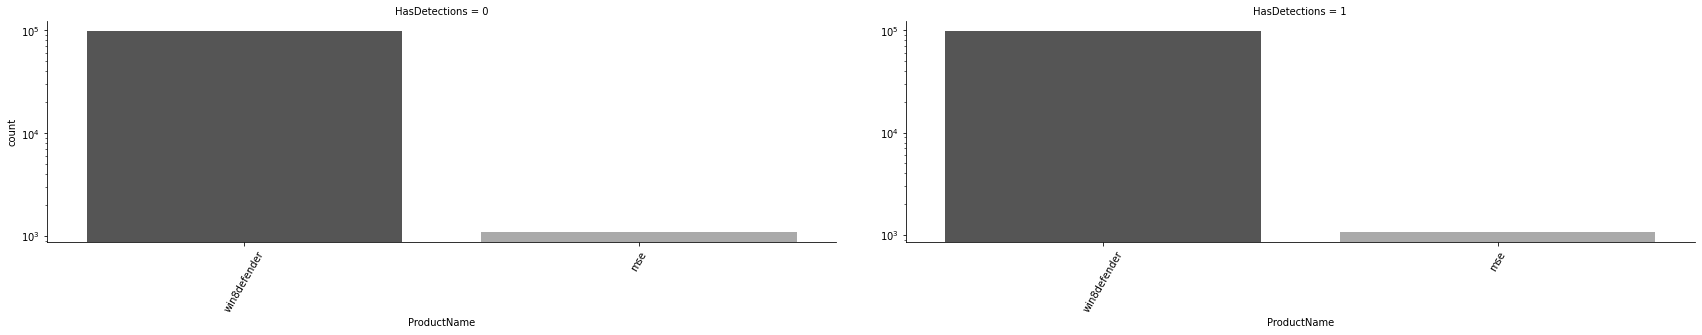

<Figure size 1152x432 with 0 Axes>

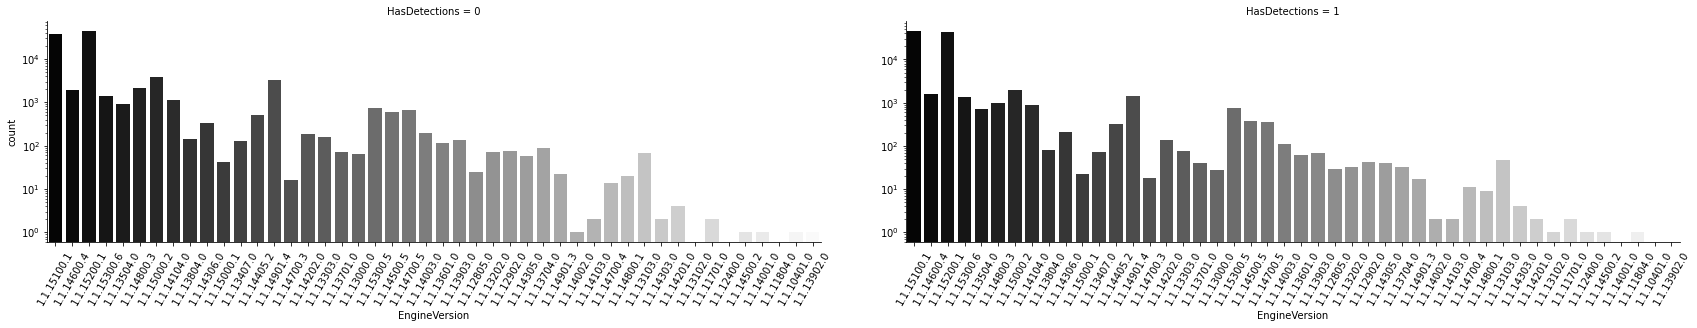

<Figure size 1152x432 with 0 Axes>

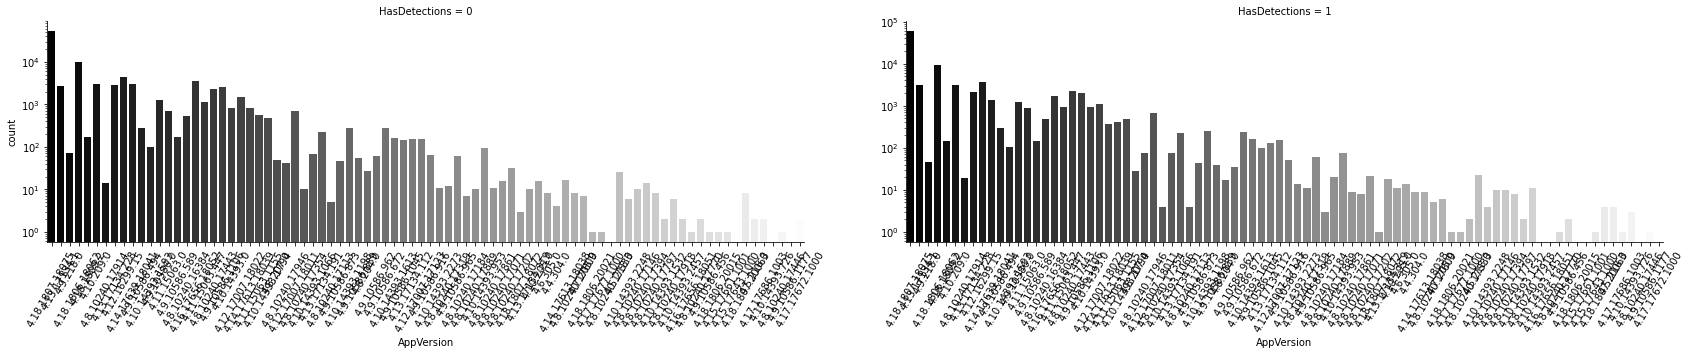

<Figure size 1152x432 with 0 Axes>

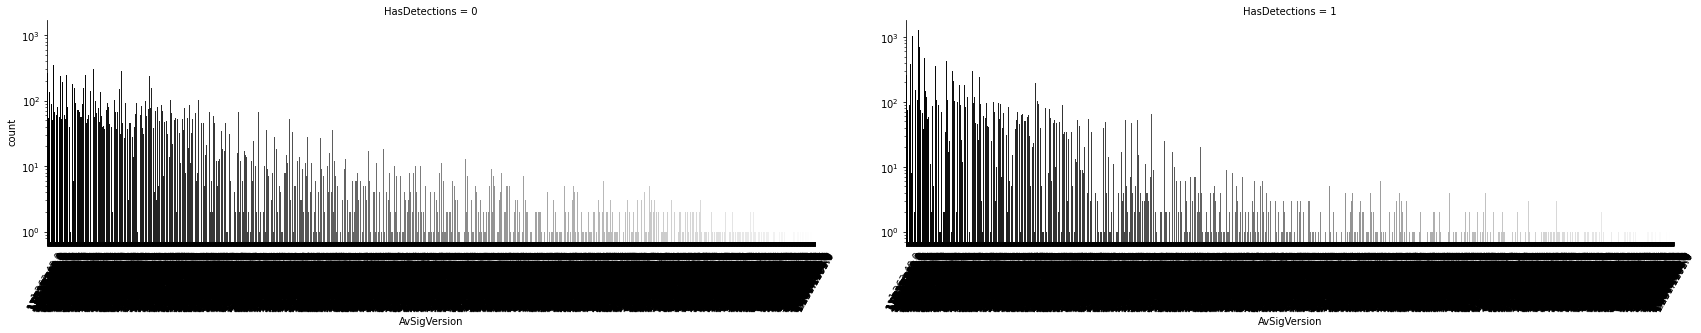

<Figure size 1152x432 with 0 Axes>

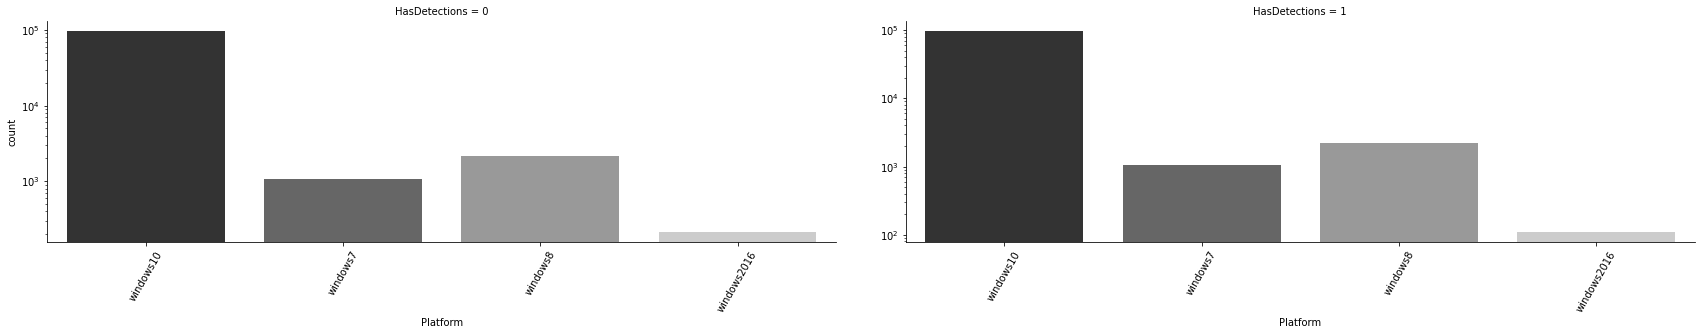

<Figure size 1152x432 with 0 Axes>

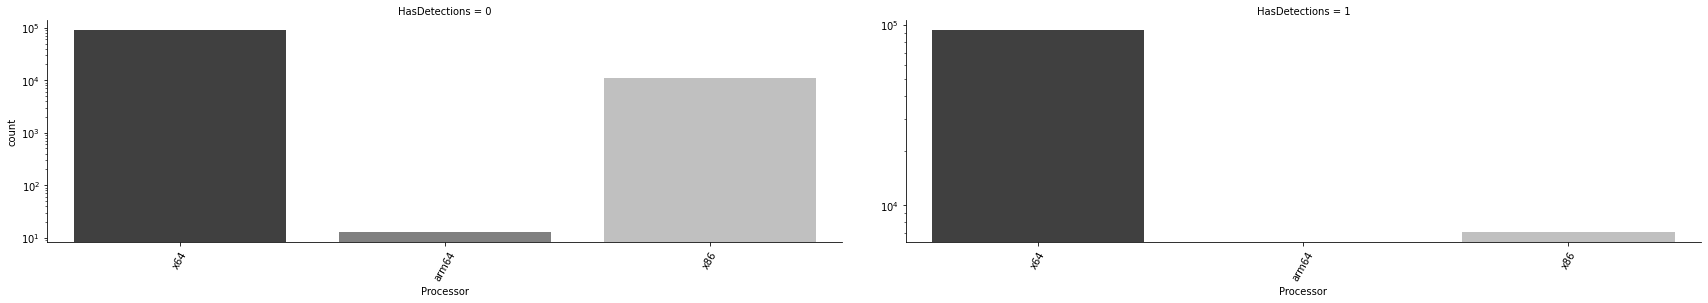

<Figure size 1152x432 with 0 Axes>

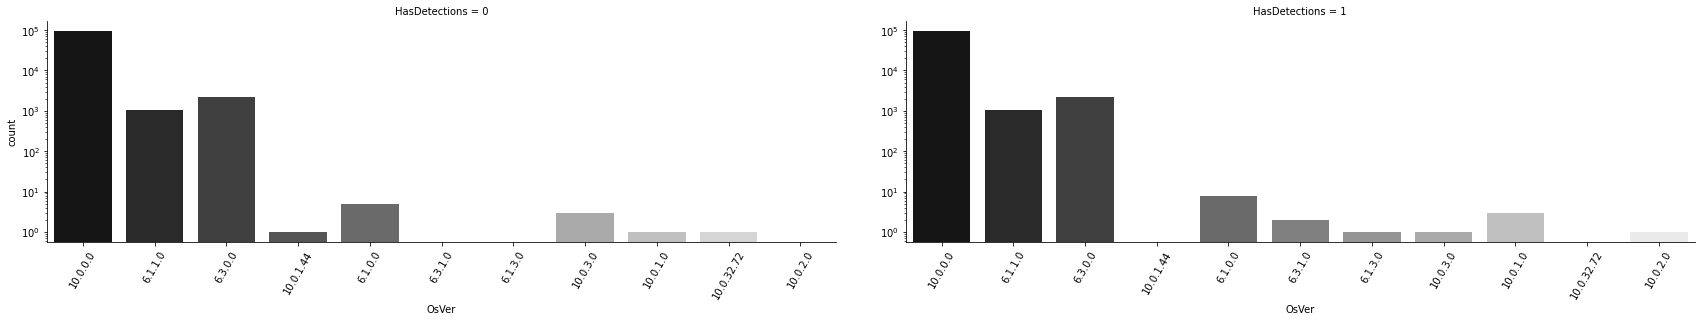

<Figure size 1152x432 with 0 Axes>

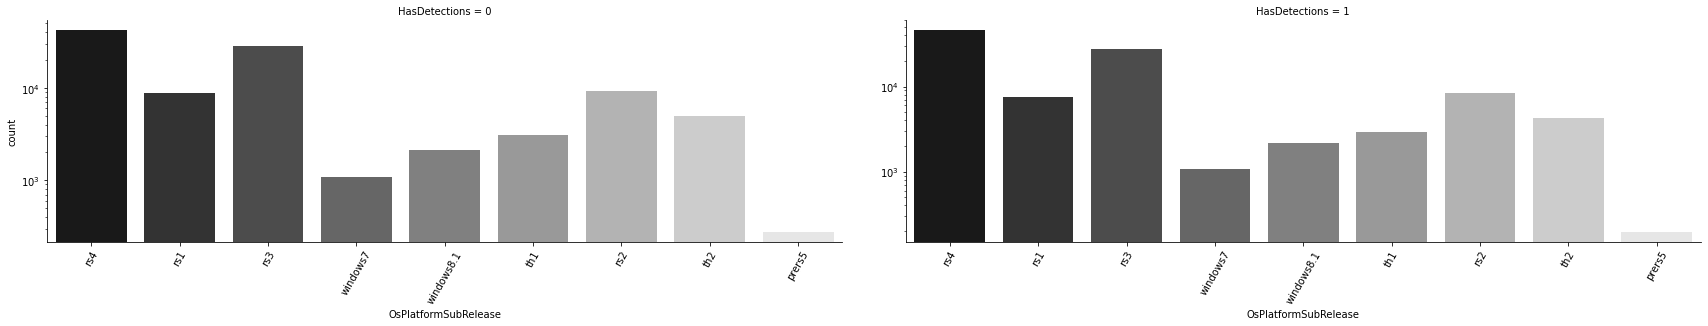

<Figure size 1152x432 with 0 Axes>

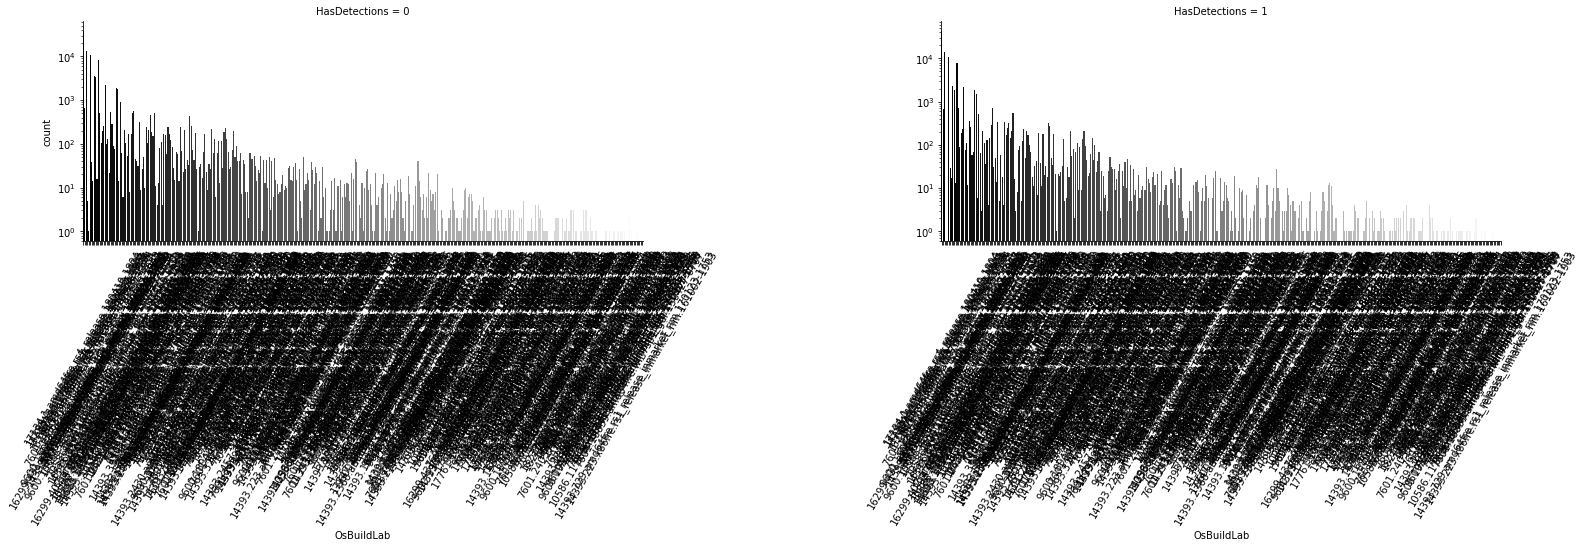

<Figure size 1152x432 with 0 Axes>

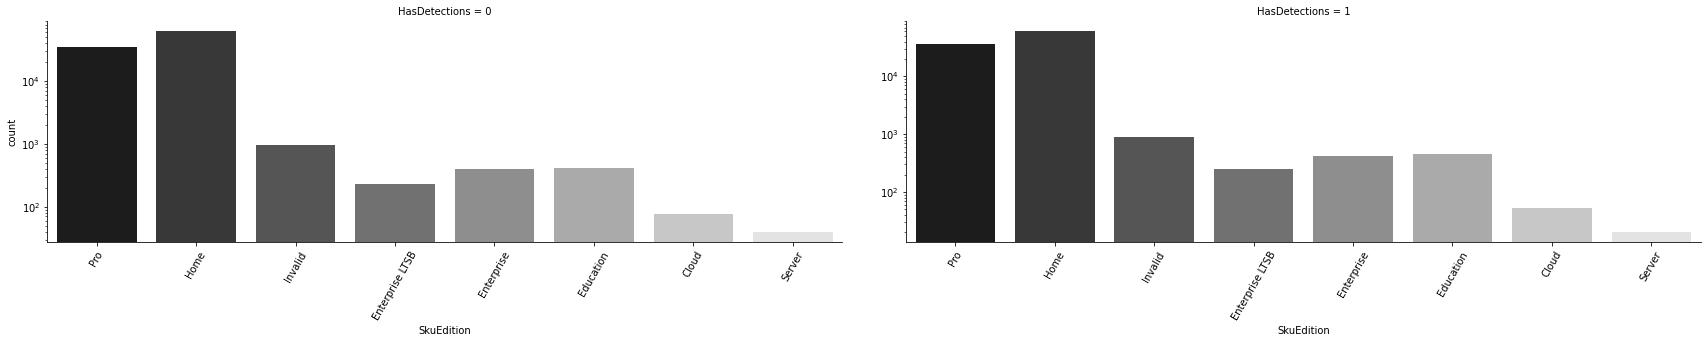

<Figure size 1152x432 with 0 Axes>

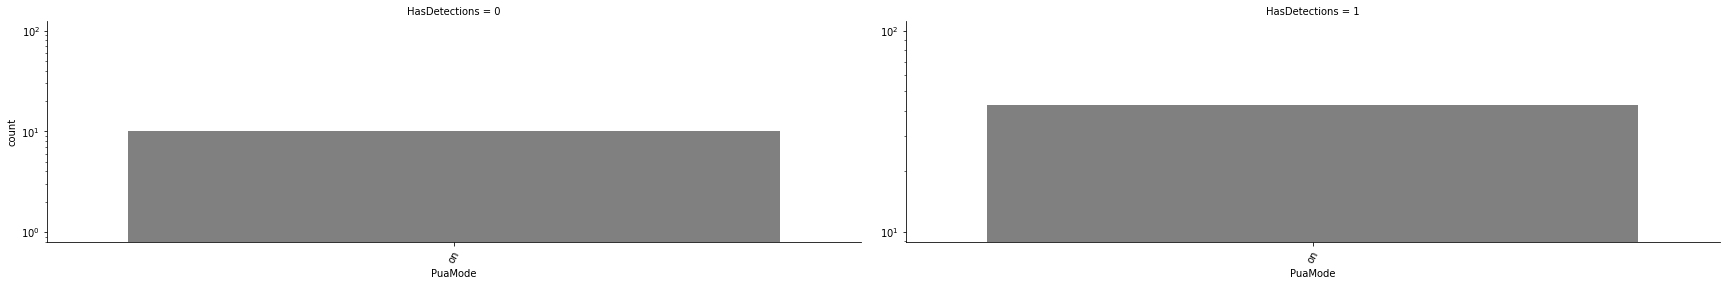

<Figure size 1152x432 with 0 Axes>

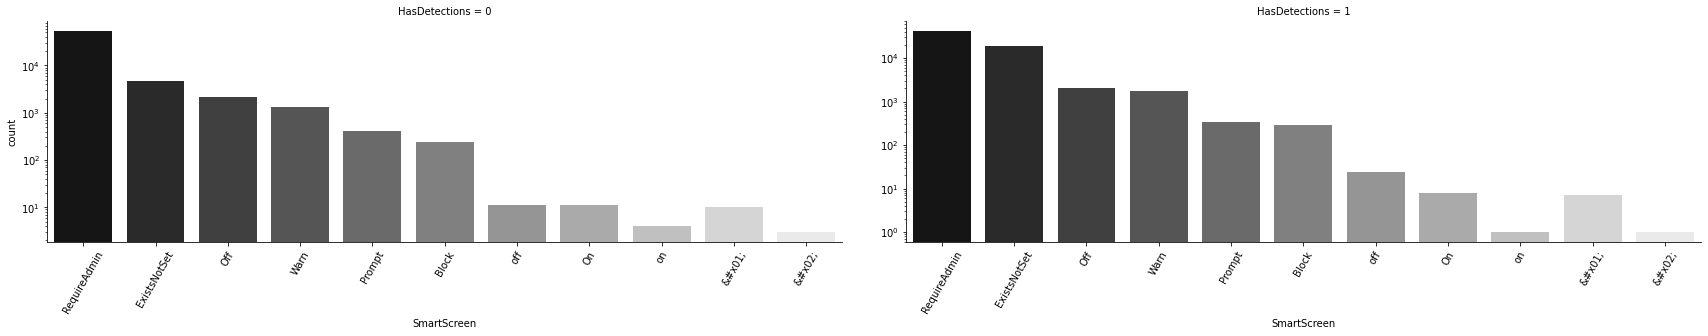

<Figure size 1152x432 with 0 Axes>

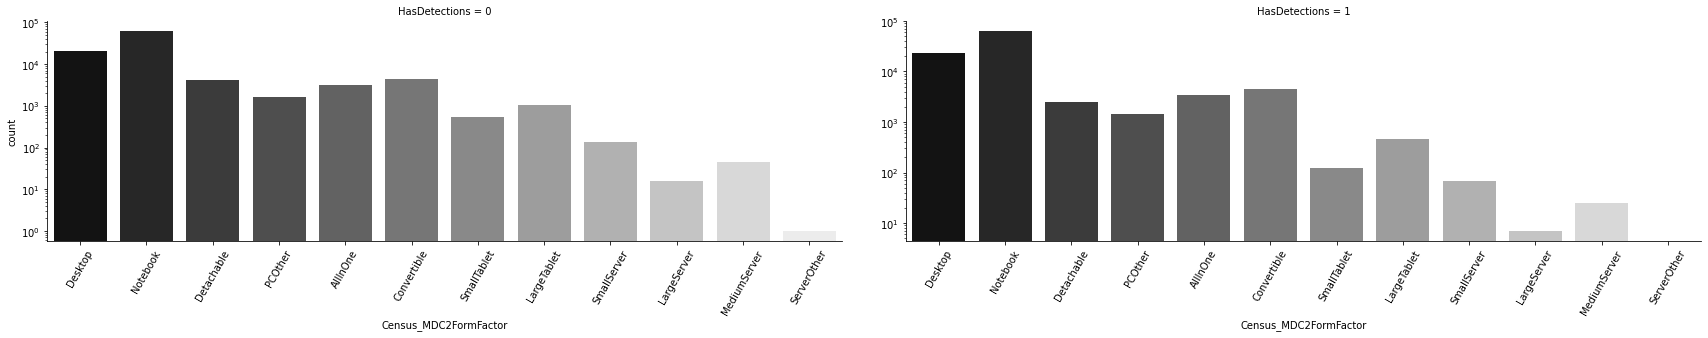

<Figure size 1152x432 with 0 Axes>

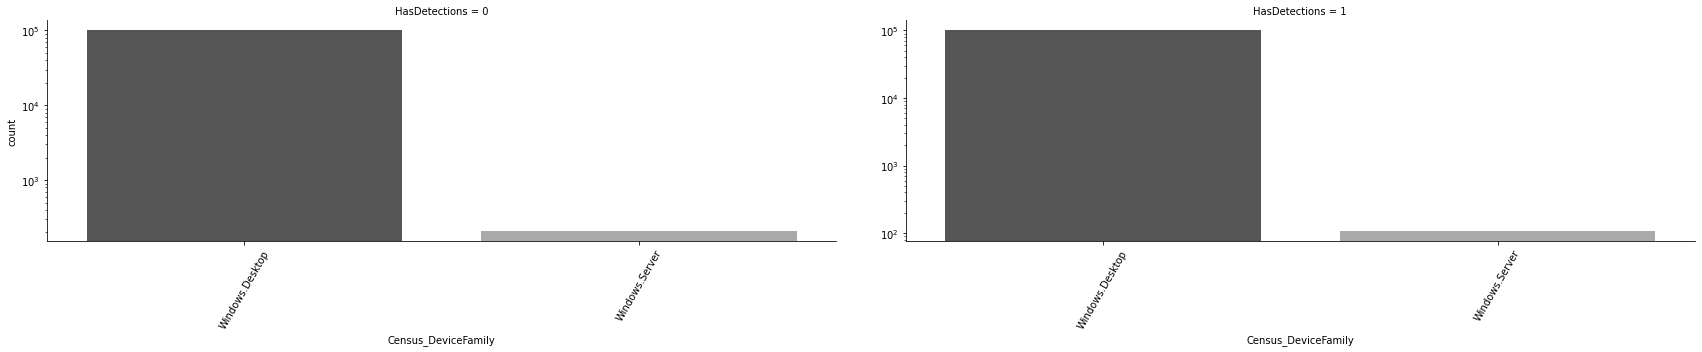

<Figure size 1152x432 with 0 Axes>

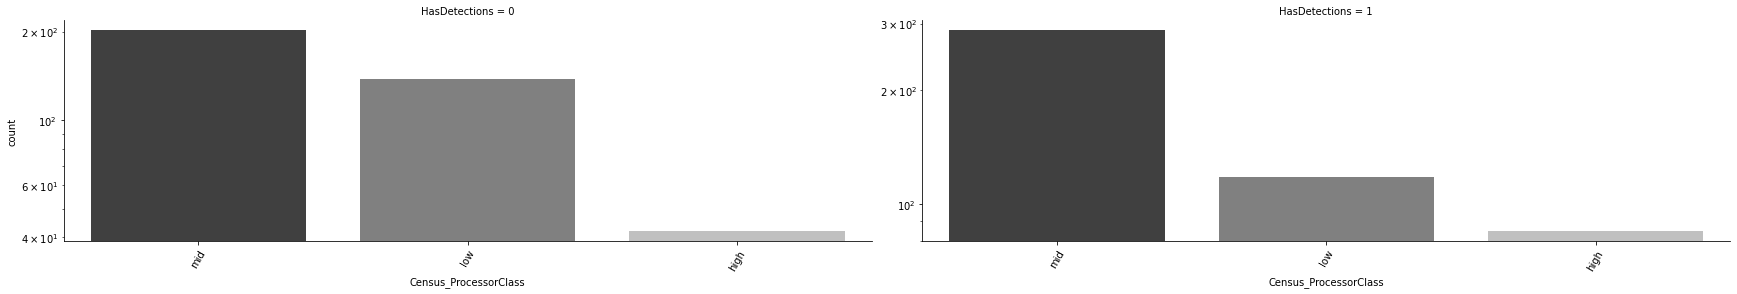

<Figure size 1152x432 with 0 Axes>

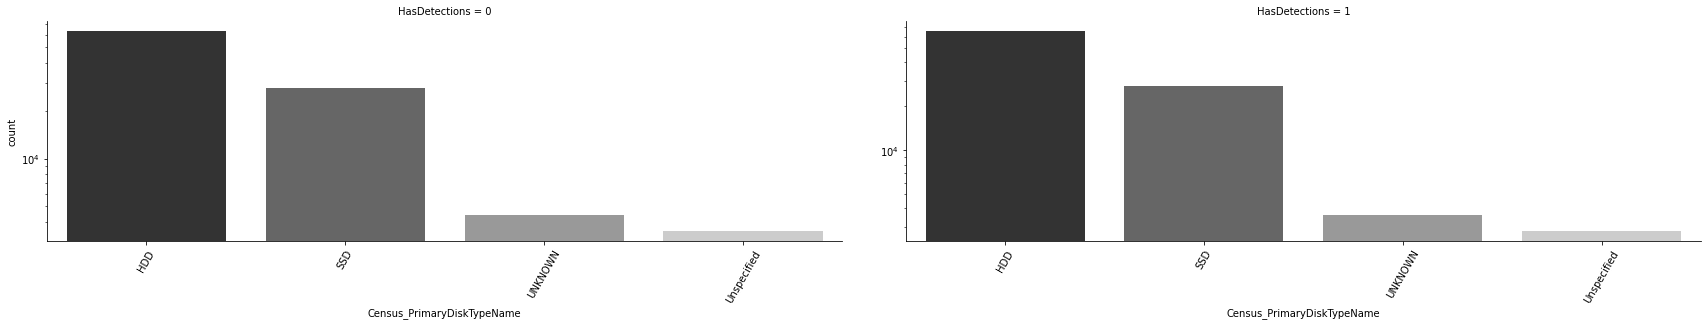

<Figure size 1152x432 with 0 Axes>

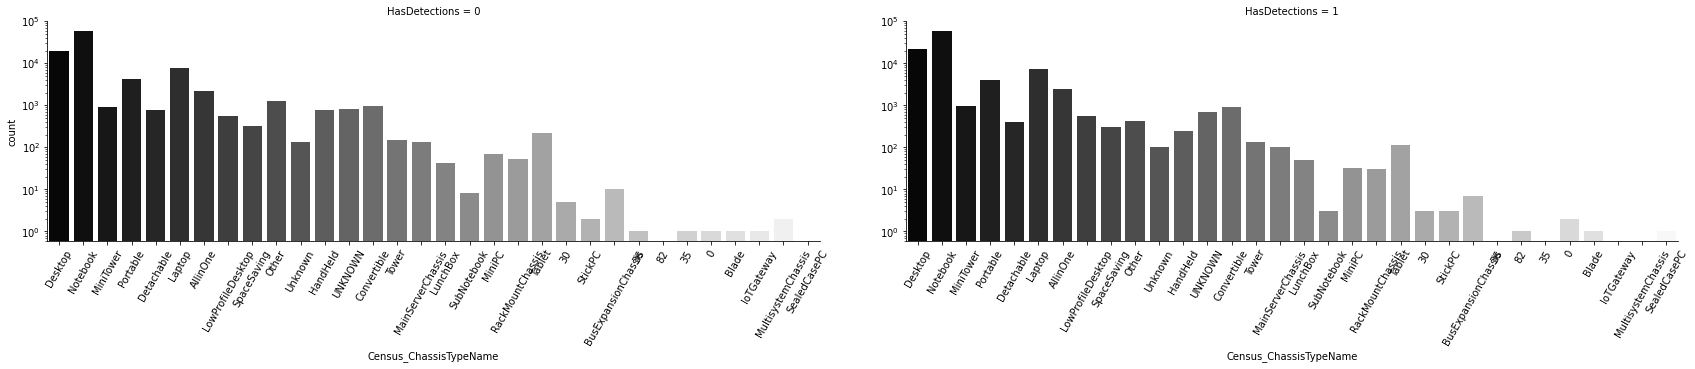

<Figure size 1152x432 with 0 Axes>

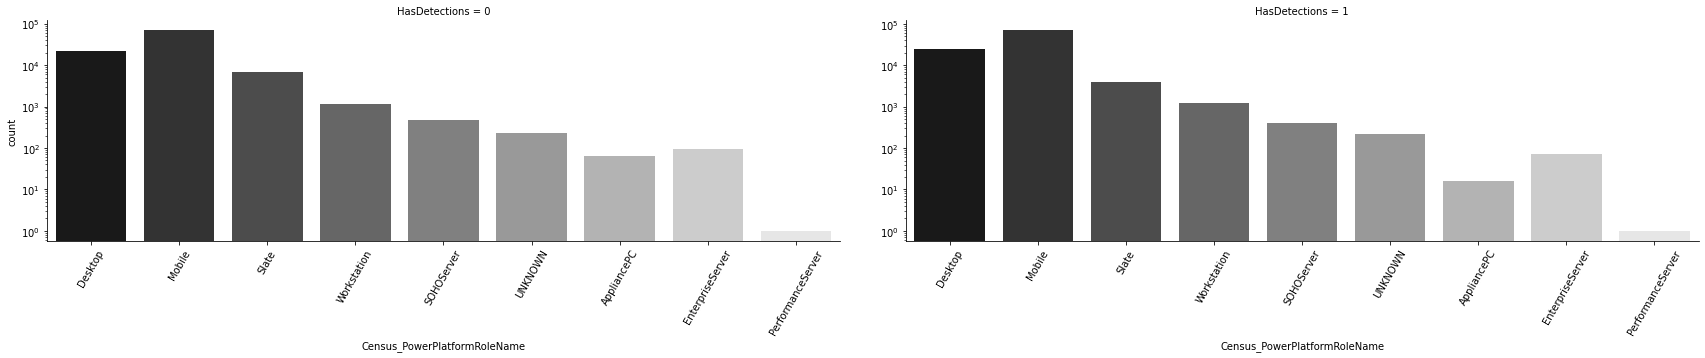

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 4 () missing from current font.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1152x432 with 0 Axes>

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


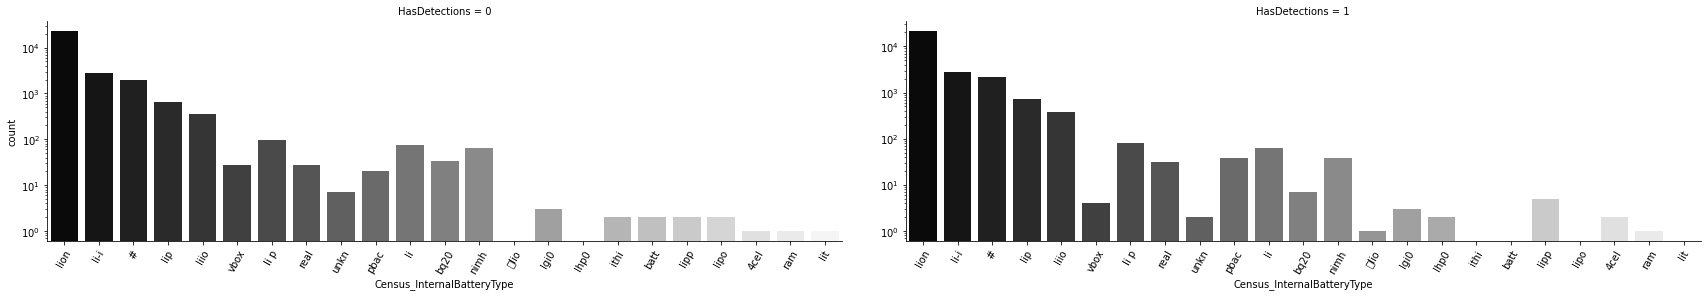

<Figure size 1152x432 with 0 Axes>

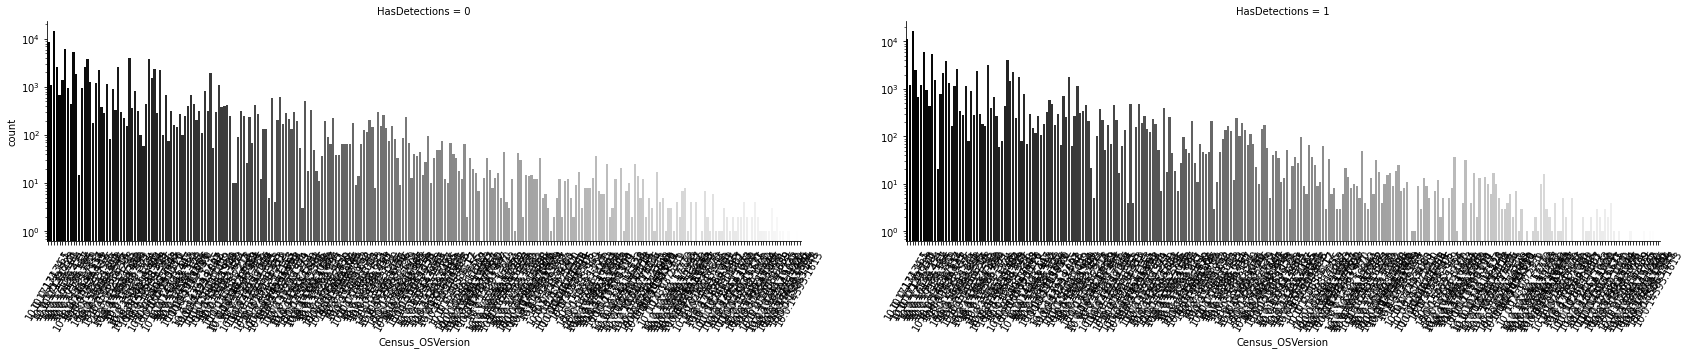

<Figure size 1152x432 with 0 Axes>

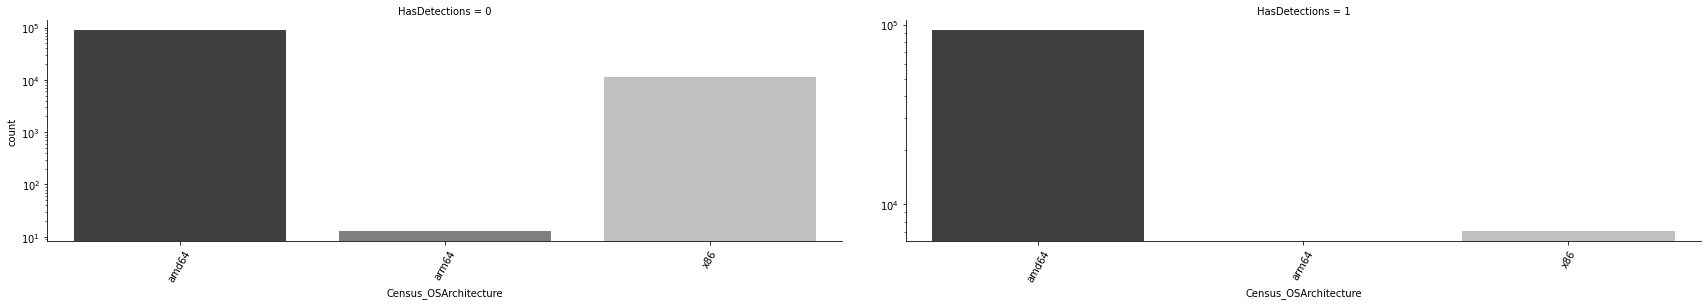

<Figure size 1152x432 with 0 Axes>

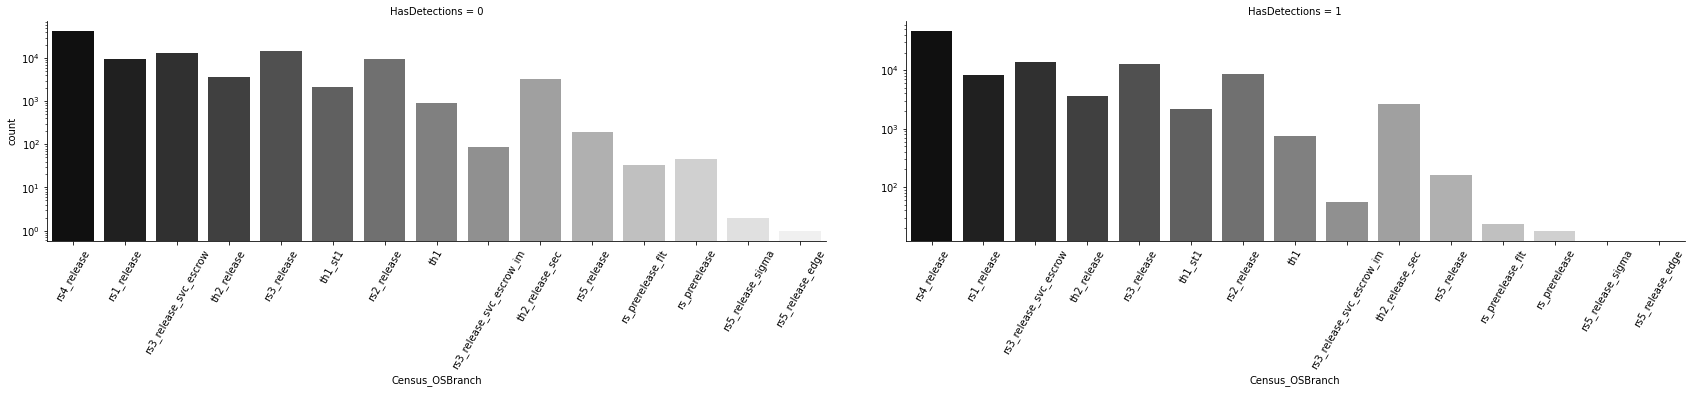

<Figure size 1152x432 with 0 Axes>

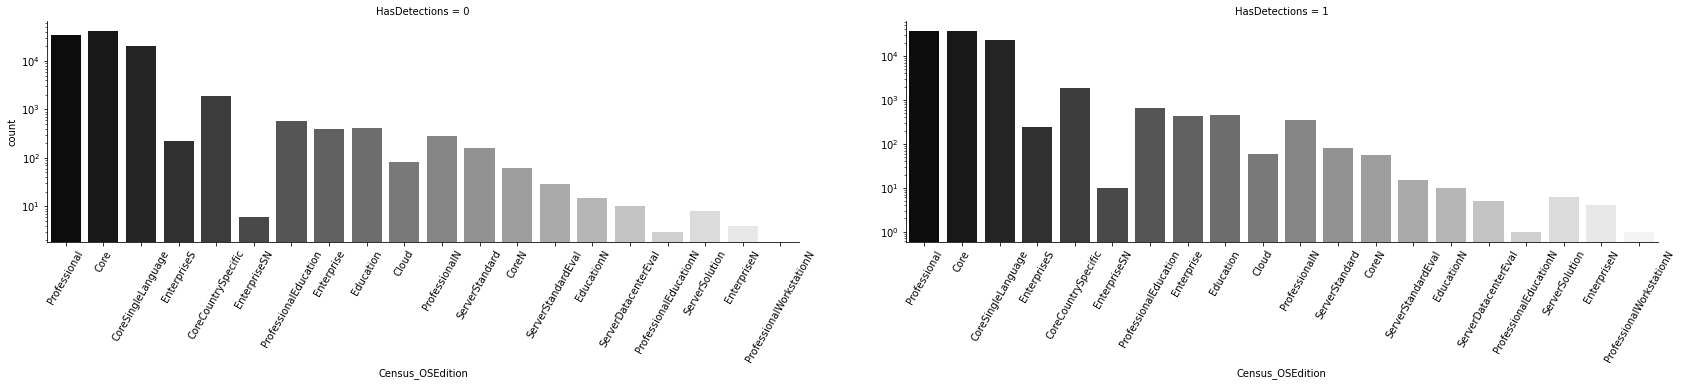

<Figure size 1152x432 with 0 Axes>

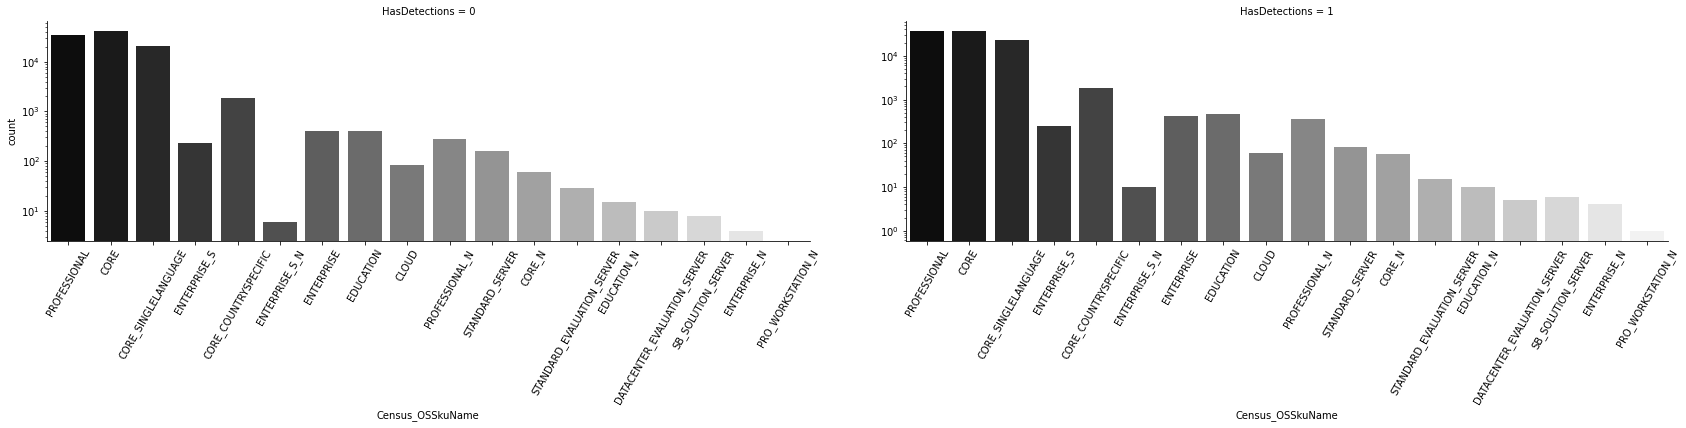

<Figure size 1152x432 with 0 Axes>

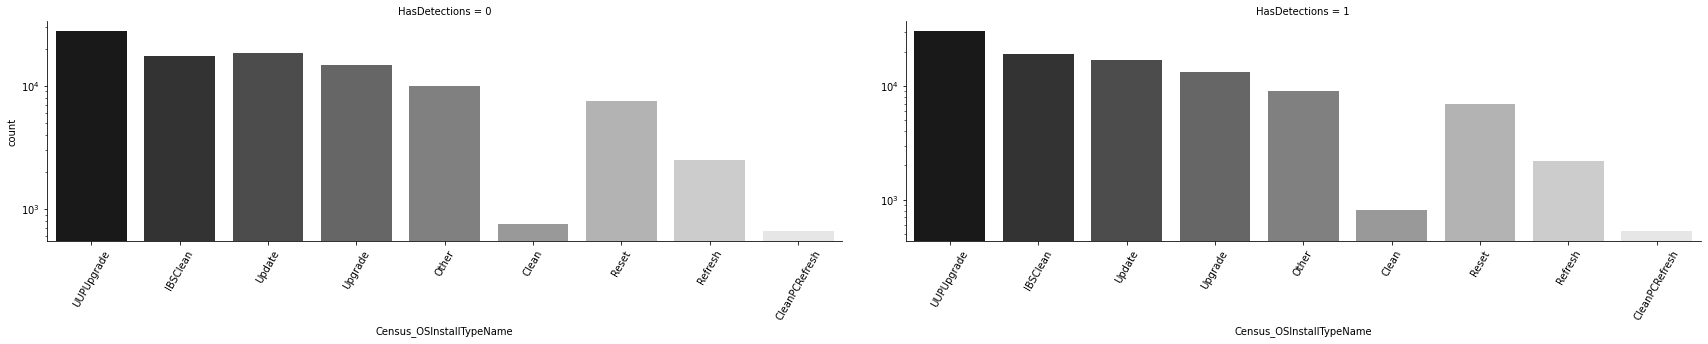

<Figure size 1152x432 with 0 Axes>

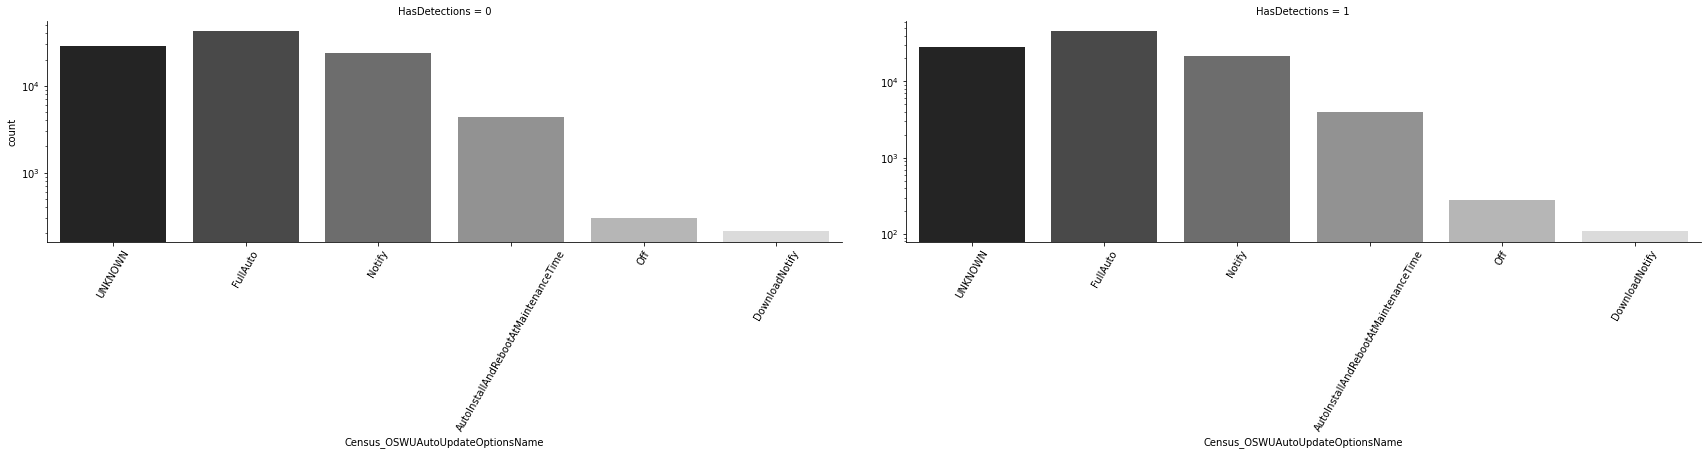

<Figure size 1152x432 with 0 Axes>

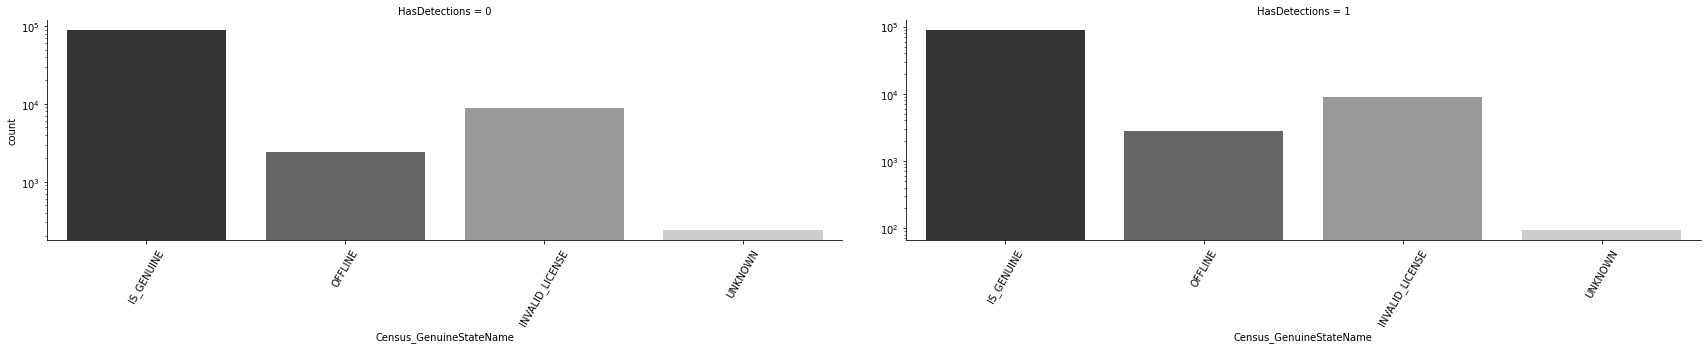

<Figure size 1152x432 with 0 Axes>

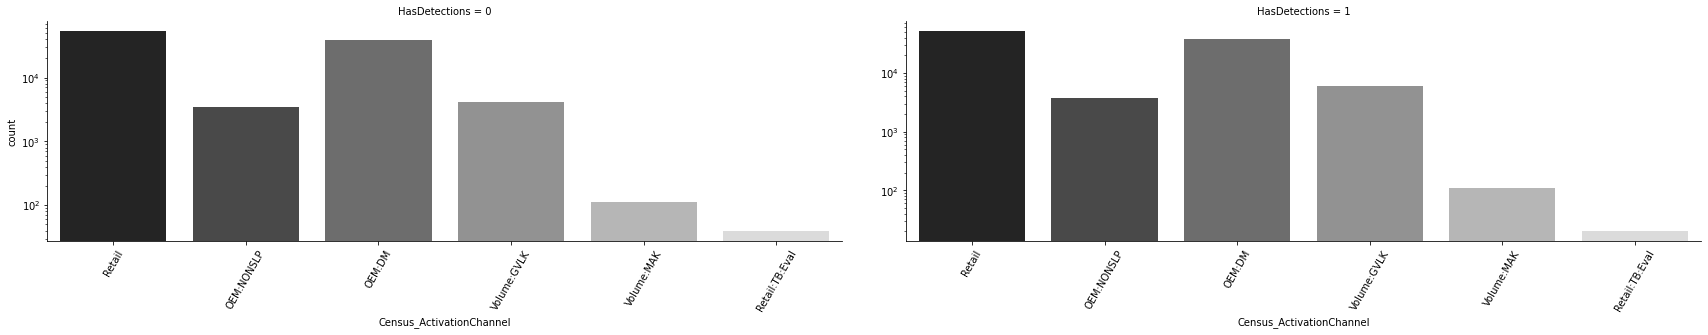

<Figure size 1152x432 with 0 Axes>

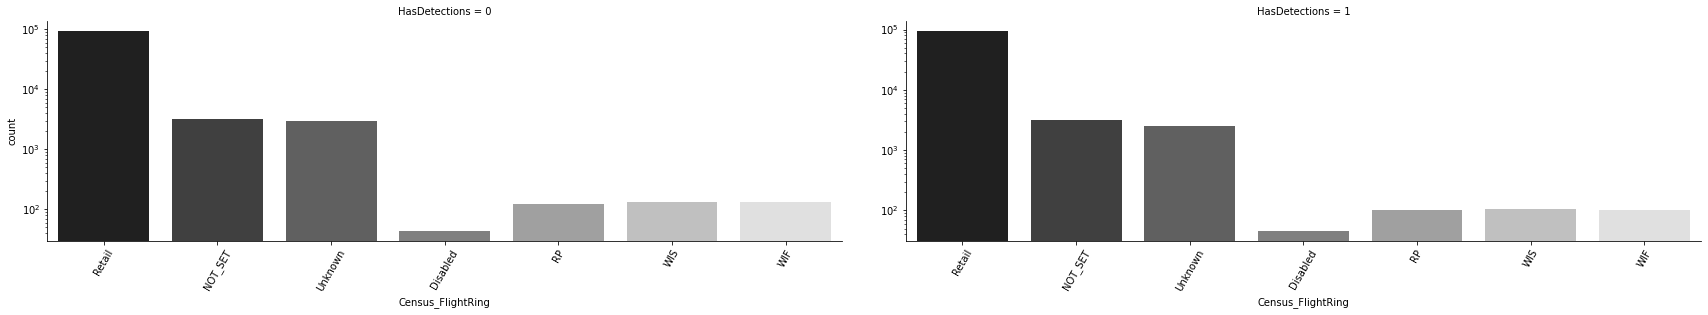

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in colu:
    plt.figure(figsize=(16,6))
    g = sns.catplot(x=i, col='HasDetections', kind='count', palette='gray', sharey=False, data=train_data_10, height=4, aspect=3).set_xticklabels(rotation=60)
    g.set(yscale='log')
    plt.tight_layout()
    plt.show()

In [415]:
filtered_train_data

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,Platform,Processor,OsVer,OsPlatformSubRelease,...,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_IsVirtualDevice
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,windows10,x64,10.0.0.0,rs4,...,Professional,PROFESSIONAL,UUPUpgrade,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,0.0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,windows10,x64,10.0.0.0,rs4,...,Professional,PROFESSIONAL,IBSClean,UNKNOWN,0,OFFLINE,Retail,0.0,NOT_SET,0.0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,windows10,x64,10.0.0.0,rs4,...,Core,CORE,UUPUpgrade,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,0.0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,windows10,x64,10.0.0.0,rs4,...,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,0.0
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,windows10,x64,10.0.0.0,rs4,...,Core,CORE,Update,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,05c15aa6487f9710169e37c749a10441,win8defender,1.1.15100.1,4.18.1807.18075,1.273.894.0,0,windows10,x64,10.0.0.0,rs3,...,Core,CORE,UUPUpgrade,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,0.0,Retail,0.0
199996,05c15b7b1b0f9f19a3279eee6572b3cd,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1234.0,0,windows10,x64,10.0.0.0,rs3,...,Core,CORE,Upgrade,Notify,0,IS_GENUINE,OEM:DM,0.0,Retail,0.0
199997,05c15e17f59c0e298c06dea9ed3a3ab4,win8defender,1.1.15000.2,4.18.1806.18062,1.271.1198.0,0,windows10,x64,10.0.0.0,rs4,...,CoreSingleLanguage,CORE_SINGLELANGUAGE,UUPUpgrade,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,0.0
199998,05c15e1affb2558420062f2d994f90d1,win8defender,1.1.15100.1,4.11.15063.447,1.273.438.0,0,windows10,x86,10.0.0.0,rs2,...,Core,CORE,Other,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,0.0


In [204]:
class ToyClass:
    def instancemethod(self):
        return 'isinstance method called: ',self
    @classmethod
    def classmethod(cls):
        return 'class method called', cls
    @staticmethod
    def staticmethod():
        return 'static method called'

In [251]:
from datetime import date
class change_it:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    @classmethod
    def from_birth_year(cls, name, year):
        return cls(name, date.today().year - year)
    @staticmethod
    def is_adult(age):
        return age > 18
    

In [247]:
from datetime import date
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    @classmethod
    def from_birth_year(cls, name, year):
        return cls(name, date.today().year - year)
    @staticmethod
    def is_adult(age):
        return age > 18
person1 = Person('Sarah', 25)
person2 = Person.from_birth_year('Roark', 1994)